<a href="https://colab.research.google.com/github/emerson-matos/tcc-notebooks/blob/main/sentimentos/analise_with_vicuna_with_openchat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
!nvidia-smi

Tue Jul 23 02:26:37 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 555.58.02              Driver Version: 555.58.02      CUDA Version: 12.5     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4070 Ti     Off |   00000000:08:00.0  On |                  N/A |
|  0%   36C    P5             21W /  285W |    1082MiB /  12282MiB |     27%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
date = '2023-09-01'
filename = 'analisar.csv'
original = pd.read_csv(f"/content/gdrive/MyDrive/tcc/exploratoria/{date}-{filename}")

original.sample(5)

,retrieval_date,rating,relative_date,likes,user_is_local_guide,text,source,user_reviews,data_avaliacao,mes_avaliacao,ano_avaliacao,mes_ano_avaliacao,com_texto,nao_vazio,traduzido,depois_2017,analisar
4432,2023-07-07 00:54:30.337834,5.0,um ano atrás,0,True,"Muito acolhedor, funcionários muito educados, ...",salinas-maceió-all-inclusive-resort,56,2022-07-07,7,2022,2022-07,True,True,False,True,True
46626,2023-07-07 00:56:08.808212,4.0,um ano atrás,0,False,Muito bom,salinas-maragogi-all-inclusive-resort,2,2022-07-07,7,2022,2022-07,True,True,False,True,True
17032,2023-07-07 00:40:06.343483,5.0,2 meses atrás,1,True,Hotel diferenciado; destaco a limpeza dos quar...,hotel-vila-galé---touros,113,2023-05-08,5,2023,2023-05,True,True,False,True,True
11844,2023-07-07 00:44:11.084417,5.0,um ano atrás,0,True,"A estrutura é enorme. Várias piscinas, praia, ...",la-torre-resort-all-inclusive,67,2022-07-07,7,2022,2022-07,True,True,False,True,True
22292,2023-07-07 00:47:29.824339,5.0,3 anos atrás,0,False,Os funcionários são educadíssimos e atenciosos...,makai-resort-aracaju---all-inclusive,Um,2020-07-07,7,2020,2020-07,True,True,False,True,True


In [ ]:
# treinado = pd.read_csv(f"/content/gdrive/MyDrive/tcc/testando-classificacao.csv")

# treinado.sample(5)

In [3]:
bert = pd.read_csv(f"/content/gdrive/MyDrive/tcc/bert/analise_sentimento_v2.csv", index_col = 0)

bert.sample(5)

,retrieval_date,rating,relative_date,likes,user_is_local_guide,text,source,user_reviews,data_avaliacao,mes_avaliacao,...,depois_2017,analisar,sentiment_bert_1,sentiment_bert_2,sentiment_bert_3,sentiment_bert_4,sentiment_bert_5,sentiment_bert,sentiment_label,sentiment_score
38683,2023-07-07 00:44:24.818773,4.0,um ano atrás,0,False,Tudo,iberostar-bahia,4,2022-07-07,7,...,True,True,"{'label': 'positive', 'score': 0.8212609887123...","{'label': 'positive', 'score': 0.4054795801639...","{'label': 'Neutral', 'score': 0.913355827331543}","{'label': 'neutral', 'score': 0.40985575318336...","{'label': 'Muito Positivo', 'score': 0.6093111...","[{'label': 'Neutral', 'score': 0.9133558273315...","['neutral', 'positive', 'muito positivo']","{0.913355827331543, 0.8212609887123108, 0.4054..."
36946,2023-07-07 00:39:45.780935,5.0,uma semana atrás,0,False,"Resort muito bom, a equipe de animação é demai...",iberostar-bahia,Um,2023-06-30,6,...,True,True,"{'label': 'negative', 'score': 0.8531317114830...","{'label': 'positive', 'score': 0.8810868859291...","{'label': 'Positive', 'score': 0.989497184753418}","{'label': 'positive', 'score': 0.9174087047576...","{'label': 'Muito Positivo', 'score': 0.8971723...","[{'label': 'Positive', 'score': 0.989497184753...","['positive', 'muito positivo', 'negative']","{0.989497184753418, 0.9174087047576904, 0.8531..."
18289,2023-07-07 00:44:58.775540,5.0,4 anos atrás,0,True,Ótimo custo benefício... Quartos amplos e pisc...,hotel-vila-galé---touros,77,2019-07-08,7,...,True,True,"{'label': 'negative', 'score': 0.5372437834739...","{'label': 'positive', 'score': 0.800549328327179}","{'label': 'Positive', 'score': 0.9922785758972...","{'label': 'positive', 'score': 0.9072859287261...","{'label': 'Muito Positivo', 'score': 0.6605810...","[{'label': 'Positive', 'score': 0.992278575897...","['positive', 'muito positivo', 'negative']","{0.9922785758972168, 0.9072859287261963, 0.537..."
31057,2023-07-07 00:56:06.204195,5.0,4 anos atrás,0,False,Maravilhoso!!!,cana-brava-all-inclusive-resort,11,2019-07-08,7,...,True,True,"{'label': 'positive', 'score': 0.9945266842842...","{'label': 'positive', 'score': 0.9481497406959...","{'label': 'Positive', 'score': 0.991863489151001}","{'label': 'positive', 'score': 0.9153501391410...","{'label': 'Muito Positivo', 'score': 0.9640583...","[{'label': 'positive', 'score': 0.994526684284...","['positive', 'muito positivo']","{0.9945266842842102, 0.991863489151001, 0.9153..."
1303,2023-07-07 00:37:25.078513,2.0,4 anos atrás,0,False,Hotel que não tem disponibilidade de uma cerve...,hotel-marsol-beach-resort,17,2019-07-08,7,...,True,True,"{'label': 'negative', 'score': 0.934661328792572}","{'label': 'negative', 'score': 0.5710440874099...","{'label': 'Neutral', 'score': 0.9091250896453857}","{'label': 'negative', 'score': 0.6720370650291...","{'label': 'Muito Negativo', 'score': 0.9354376...","[{'label': 'Muito Negativo', 'score': 0.935437...","['muito negativo', 'negative', 'neutral']","{0.9354376196861267, 0.934661328792572, 0.5710..."


In [4]:
gpt = pd.read_csv(f"/content/gdrive/MyDrive/tcc/bert/analise_sentimento_gpt.csv", index_col = 0)
gpt = gpt.rename(columns={"tokens": "tokens_gpt"})
gpt = gpt.reset_index(drop=True)
gpt.sample(5)

,retrieval_date,rating,relative_date,likes,user_is_local_guide,text,source,user_reviews,data_avaliacao,mes_avaliacao,ano_avaliacao,mes_ano_avaliacao,com_texto,nao_vazio,traduzido,depois_2017,analisar,sentimento_gpt,resultado_gpt,tokens_gpt
14566,2023-07-07 00:34:19.802187,5.0,2 semanas atrás,0,False,Muito bom e confortavel,hotel-vila-galé---touros,10,2023-06-23,6,2023,2023-06,True,True,False,True,True,positive,2,99
34605,2023-07-07 00:40:46.273915,4.0,2 anos atrás,0,True,"É o típico Vila Galé, nada me impressiona no s...",hotel-vila-galé-marés,194,2021-07-07,7,2021,2021-07,True,True,False,True,True,neutral,1,125
17407,2023-07-07 00:41:25.796659,5.0,um ano atrás,0,False,"Tudo perfeito! Ambiente, atendimento, comida!",hotel-vila-galé---touros,20,2022-07-07,7,2022,2022-07,True,True,False,True,True,positive,2,105
9291,2023-07-07 00:47:11.012879,5.0,3 meses atrás,0,False,Excelente Quartos: Ótimos Quartos : 5/5 |,nauticomar-resort-all-inclusive-_-beach-club,3,2023-04-08,4,2023,2023-04,True,True,False,True,True,positive,2,109
27265,2023-07-07 00:41:30.946612,5.0,10 meses atrás,0,False,"Quando chegamos no hotel,fomos muito bem recep...",cana-brava-all-inclusive-resort,Um,2022-09-10,9,2022,2022-09,True,True,False,True,True,positive,2,229


In [5]:
openchat = pd.read_csv(f"/content/gdrive/MyDrive/tcc/bert/analise_sentimento_openchat.csv", index_col = 0)
openchat = openchat.rename(columns={"tokens": "tokens_openchat"})
openchat = openchat.reset_index(drop=True)
openchat.sample(5)

,retrieval_date,rating,relative_date,likes,user_is_local_guide,text,source,user_reviews,data_avaliacao,mes_avaliacao,ano_avaliacao,mes_ano_avaliacao,com_texto,nao_vazio,traduzido,depois_2017,analisar,sentimento_openchat,resultado_openchat,tokens_openchat
46096,2023-07-07 00:54:44.263794,5.0,um ano atrás,0,True,Hospedei no Salinas duas vezes o serviço foi e...,salinas-maragogi-all-inclusive-resort,20,2022-07-07,7,2022,2022-07,True,True,False,True,True,positive,2,139
47666,2023-07-07 00:59:20.729946,5.0,3 anos atrás,0,True,É o paraíso na terra.,salinas-maragogi-all-inclusive-resort,237,2020-07-07,7,2020,2020-07,True,True,False,True,True,positive,2,121
27090,2023-07-07 00:41:05.094524,3.0,10 meses atrás,0,False,"O resort e muito bom, a televisão do quarto nã...",cana-brava-all-inclusive-resort,Um,2022-09-10,9,2022,2022-09,True,True,False,True,True,positive,2,229
22745,2023-07-07 00:48:53.965669,5.0,4 anos atrás,0,True,O melhor do Makai é a equipe. Todos os funcion...,makai-resort-aracaju---all-inclusive,16,2019-07-08,7,2019,2019-07,True,True,False,True,True,positive,2,190
45293,2023-07-07 01:17:44.633943,5.0,5 anos atrás,0,True,Fantástico,iberostar-bahia,15,2018-07-08,7,2018,2018-07,True,True,False,True,True,positive,2,117


In [6]:
vicuna = pd.read_csv(f"/content/gdrive/MyDrive/tcc/bert/analise_sentimento_vicuna.csv", index_col = 0)
vicuna = vicuna.rename(columns={"sentimento_gpt": "sentimento_vicuna", "resultado_gpt":  "resultado_vicuna", "tokens": "tokens_vicuna"})
vicuna = vicuna.reset_index(drop=True)
vicuna.sample(5)

,retrieval_date,rating,relative_date,likes,user_is_local_guide,text,source,user_reviews,data_avaliacao,mes_avaliacao,ano_avaliacao,mes_ano_avaliacao,com_texto,nao_vazio,traduzido,depois_2017,analisar,sentimento_vicuna,resultado_vicuna,tokens_vicuna
10374,2023-07-07 00:50:01.259530,4.0,3 anos atrás,0,False,Tem comida boa,nauticomar-resort-all-inclusive-_-beach-club,Um,2020-07-07,7,2020,2020-07,True,True,False,True,True,positive,2,141
21655,2023-07-07 00:45:46.784858,5.0,2 anos atrás,0,False,Achei uma ótima Experiência. Os Atendentes e t...,makai-resort-aracaju---all-inclusive,19,2021-07-07,7,2021,2021-07,True,True,False,True,True,positive,2,222
33855,2023-07-07 00:38:32.791835,4.0,um ano atrás,0,False,Excelente o lugar,hotel-vila-galé-marés,3,2022-07-07,7,2022,2022-07,True,True,False,True,True,positive,2,140
34261,2023-07-07 00:39:44.088900,5.0,2 anos atrás,0,False,Hóspede bem monitorado devido a pandemia,hotel-vila-galé-marés,25,2021-07-07,7,2021,2021-07,True,True,False,True,True,neutral,1,149
27094,2023-07-07 00:41:06.746250,5.0,10 meses atrás,0,False,Por que a todos os nos trataram bem O pessoal ...,cana-brava-all-inclusive-resort,2,2022-09-10,9,2022,2022-09,True,True,False,True,True,positive,2,165


In [7]:
original.shape

(49219, 17)

In [8]:
bert.shape

(49219, 25)

In [9]:
gpt.shape

(49219, 20)

In [10]:
openchat.shape

(49219, 20)

In [11]:
vicuna.shape

(49219, 20)

In [12]:
values = original['text'].value_counts()
values[values < 5]

Ótimo lugar recomendo                                                                                                                                4
Está sendo ótima                                                                                                                                     4
Comida maravilhosa                                                                                                                                   4
Hotel excelente                                                                                                                                      4
Lindo.                                                                                                                                               4
                                                                                                                                                    ..
Melhor experiência que já vivi. Quartos: Não quero ir mais embora. Segurança: Sem me preocupar

In [13]:
texto_mascara = 'Ótimo lugar recomendo'

In [14]:
ocopy = original[original['text'] == texto_mascara].copy()

In [15]:
gcopy = gpt[gpt['text'] == texto_mascara].copy()

In [16]:
bcopy = bert[bert['text'] == texto_mascara].copy()

In [17]:
opccopy = openchat[openchat['text'] == texto_mascara].copy()

In [18]:
vcopy = vicuna[vicuna['text'] == texto_mascara].copy()

In [19]:
ocopy

,retrieval_date,rating,relative_date,likes,user_is_local_guide,text,source,user_reviews,data_avaliacao,mes_avaliacao,ano_avaliacao,mes_ano_avaliacao,com_texto,nao_vazio,traduzido,depois_2017,analisar
7481,2023-07-07 00:37:02.963080,5.0,3 anos atrás,0,False,Ótimo lugar recomendo,hotel-vila-galé_-eco-resort---cabo,11,2020-07-07,7,2020,2020-07,True,True,False,True,True
10469,2023-07-07 00:50:23.242643,5.0,3 anos atrás,0,True,Ótimo lugar recomendo,nauticomar-resort-all-inclusive-_-beach-club,32,2020-07-07,7,2020,2020-07,True,True,False,True,True
31001,2023-07-07 00:55:47.938469,5.0,4 anos atrás,1,True,Ótimo lugar recomendo,cana-brava-all-inclusive-resort,71,2019-07-08,7,2019,2019-07,True,True,False,True,True
32911,2023-07-07 00:36:14.448215,5.0,7 meses atrás,0,True,Ótimo lugar recomendo,hotel-vila-galé-marés,8,2022-12-09,12,2022,2022-12,True,True,False,True,True


In [20]:
gcopy

,retrieval_date,rating,relative_date,likes,user_is_local_guide,text,source,user_reviews,data_avaliacao,mes_avaliacao,ano_avaliacao,mes_ano_avaliacao,com_texto,nao_vazio,traduzido,depois_2017,analisar,sentimento_gpt,resultado_gpt,tokens_gpt
7481,2023-07-07 00:37:02.963080,5.0,3 anos atrás,0,False,Ótimo lugar recomendo,hotel-vila-galé_-eco-resort---cabo,11,2020-07-07,7,2020,2020-07,True,True,False,True,True,positive,2,99
10469,2023-07-07 00:50:23.242643,5.0,3 anos atrás,0,True,Ótimo lugar recomendo,nauticomar-resort-all-inclusive-_-beach-club,32,2020-07-07,7,2020,2020-07,True,True,False,True,True,positive,2,99
31001,2023-07-07 00:55:47.938469,5.0,4 anos atrás,1,True,Ótimo lugar recomendo,cana-brava-all-inclusive-resort,71,2019-07-08,7,2019,2019-07,True,True,False,True,True,positive,2,99
32911,2023-07-07 00:36:14.448215,5.0,7 meses atrás,0,True,Ótimo lugar recomendo,hotel-vila-galé-marés,8,2022-12-09,12,2022,2022-12,True,True,False,True,True,positive,2,99


In [21]:
opccopy

,retrieval_date,rating,relative_date,likes,user_is_local_guide,text,source,user_reviews,data_avaliacao,mes_avaliacao,ano_avaliacao,mes_ano_avaliacao,com_texto,nao_vazio,traduzido,depois_2017,analisar,sentimento_openchat,resultado_openchat,tokens_openchat
7481,2023-07-07 00:37:02.963080,5.0,3 anos atrás,0,False,Ótimo lugar recomendo,hotel-vila-galé_-eco-resort---cabo,11,2020-07-07,7,2020,2020-07,True,True,False,True,True,positive,2,120
10469,2023-07-07 00:50:23.242643,5.0,3 anos atrás,0,True,Ótimo lugar recomendo,nauticomar-resort-all-inclusive-_-beach-club,32,2020-07-07,7,2020,2020-07,True,True,False,True,True,positive,2,120
31001,2023-07-07 00:55:47.938469,5.0,4 anos atrás,1,True,Ótimo lugar recomendo,cana-brava-all-inclusive-resort,71,2019-07-08,7,2019,2019-07,True,True,False,True,True,positive,2,120
32911,2023-07-07 00:36:14.448215,5.0,7 meses atrás,0,True,Ótimo lugar recomendo,hotel-vila-galé-marés,8,2022-12-09,12,2022,2022-12,True,True,False,True,True,positive,2,120


In [22]:
bcopy

,retrieval_date,rating,relative_date,likes,user_is_local_guide,text,source,user_reviews,data_avaliacao,mes_avaliacao,...,depois_2017,analisar,sentiment_bert_1,sentiment_bert_2,sentiment_bert_3,sentiment_bert_4,sentiment_bert_5,sentiment_bert,sentiment_label,sentiment_score
7481,2023-07-07 00:37:02.963080,5.0,3 anos atrás,0,False,Ótimo lugar recomendo,hotel-vila-galé_-eco-resort---cabo,11,2020-07-07,7,...,True,True,"{'label': 'positive', 'score': 0.9562457203865...","{'label': 'positive', 'score': 0.7119402885437...","{'label': 'Positive', 'score': 0.9928576946258...","{'label': 'positive', 'score': 0.9233134388923...","{'label': 'Muito Positivo', 'score': 0.7307951...","[{'label': 'Positive', 'score': 0.992857694625...","['positive', 'muito positivo']","{0.9928576946258545, 0.9562457203865051, 0.711..."
10469,2023-07-07 00:50:23.242643,5.0,3 anos atrás,0,True,Ótimo lugar recomendo,nauticomar-resort-all-inclusive-_-beach-club,32,2020-07-07,7,...,True,True,"{'label': 'positive', 'score': 0.9562457203865...","{'label': 'positive', 'score': 0.7119402885437...","{'label': 'Positive', 'score': 0.9928576946258...","{'label': 'positive', 'score': 0.9233134388923...","{'label': 'Muito Positivo', 'score': 0.7307951...","[{'label': 'Positive', 'score': 0.992857694625...","['positive', 'muito positivo']","{0.9928576946258545, 0.9562457203865051, 0.711..."
31001,2023-07-07 00:55:47.938469,5.0,4 anos atrás,1,True,Ótimo lugar recomendo,cana-brava-all-inclusive-resort,71,2019-07-08,7,...,True,True,"{'label': 'positive', 'score': 0.9562457203865...","{'label': 'positive', 'score': 0.7119402885437...","{'label': 'Positive', 'score': 0.9928576946258...","{'label': 'positive', 'score': 0.9233134388923...","{'label': 'Muito Positivo', 'score': 0.7307951...","[{'label': 'Positive', 'score': 0.992857694625...","['positive', 'muito positivo']","{0.9928576946258545, 0.9562457203865051, 0.711..."
32911,2023-07-07 00:36:14.448215,5.0,7 meses atrás,0,True,Ótimo lugar recomendo,hotel-vila-galé-marés,8,2022-12-09,12,...,True,True,"{'label': 'positive', 'score': 0.9562457203865...","{'label': 'positive', 'score': 0.7119402885437...","{'label': 'Positive', 'score': 0.9928576946258...","{'label': 'positive', 'score': 0.9233134388923...","{'label': 'Muito Positivo', 'score': 0.7307951...","[{'label': 'Positive', 'score': 0.992857694625...","['positive', 'muito positivo']","{0.9928576946258545, 0.9562457203865051, 0.711..."


In [23]:
vcopy

,retrieval_date,rating,relative_date,likes,user_is_local_guide,text,source,user_reviews,data_avaliacao,mes_avaliacao,ano_avaliacao,mes_ano_avaliacao,com_texto,nao_vazio,traduzido,depois_2017,analisar,sentimento_vicuna,resultado_vicuna,tokens_vicuna
7481,2023-07-07 00:37:02.963080,5.0,3 anos atrás,0,False,Ótimo lugar recomendo,hotel-vila-galé_-eco-resort---cabo,11,2020-07-07,7,2020,2020-07,True,True,False,True,True,positive,2,142
10469,2023-07-07 00:50:23.242643,5.0,3 anos atrás,0,True,Ótimo lugar recomendo,nauticomar-resort-all-inclusive-_-beach-club,32,2020-07-07,7,2020,2020-07,True,True,False,True,True,positive,2,142
31001,2023-07-07 00:55:47.938469,5.0,4 anos atrás,1,True,Ótimo lugar recomendo,cana-brava-all-inclusive-resort,71,2019-07-08,7,2019,2019-07,True,True,False,True,True,positive,2,142
32911,2023-07-07 00:36:14.448215,5.0,7 meses atrás,0,True,Ótimo lugar recomendo,hotel-vila-galé-marés,8,2022-12-09,12,2022,2022-12,True,True,False,True,True,positive,2,142


In [24]:
original.shape

(49219, 17)

In [25]:
megazord_tmp = pd.merge(original, bert, how='left')
megazord_tmp2 = pd.merge(megazord_tmp, gpt, how='left')
megazord_tmp3 = pd.merge(megazord_tmp2, openchat, how='left')
megazord = pd.merge(megazord_tmp3, vicuna, how='left')

In [26]:
megazord = megazord.loc[:, ~megazord.columns.duplicated(keep='first')]

In [27]:
equal_columns = megazord.columns[megazord.nunique() == 1]

megazord = megazord.drop(columns=equal_columns)

# Reset index if needed
megazord = megazord.reset_index(drop=True)
megazord.columns

Index(['retrieval_date', 'rating', 'relative_date', 'likes',
       'user_is_local_guide', 'text', 'source', 'user_reviews',
       'data_avaliacao', 'mes_avaliacao', 'ano_avaliacao', 'mes_ano_avaliacao',
       'sentiment_bert_1', 'sentiment_bert_2', 'sentiment_bert_3',
       'sentiment_bert_4', 'sentiment_bert_5', 'sentiment_bert',
       'sentiment_label', 'sentiment_score', 'sentimento_gpt', 'resultado_gpt',
       'tokens_gpt', 'sentimento_openchat', 'resultado_openchat',
       'tokens_openchat', 'sentimento_vicuna', 'resultado_vicuna',
       'tokens_vicuna'],
      dtype='object')

In [28]:
megazord.shape

(49219, 29)

In [29]:
megazord = megazord.reset_index(drop=True)

In [30]:
megazord[megazord['text'] == texto_mascara]

,retrieval_date,rating,relative_date,likes,user_is_local_guide,text,source,user_reviews,data_avaliacao,mes_avaliacao,...,sentiment_score,sentimento_gpt,resultado_gpt,tokens_gpt,sentimento_openchat,resultado_openchat,tokens_openchat,sentimento_vicuna,resultado_vicuna,tokens_vicuna
7481,2023-07-07 00:37:02.963080,5.0,3 anos atrás,0,False,Ótimo lugar recomendo,hotel-vila-galé_-eco-resort---cabo,11,2020-07-07,7,...,"{0.9928576946258545, 0.9562457203865051, 0.711...",positive,2,99,positive,2,120,positive,2,142
10469,2023-07-07 00:50:23.242643,5.0,3 anos atrás,0,True,Ótimo lugar recomendo,nauticomar-resort-all-inclusive-_-beach-club,32,2020-07-07,7,...,"{0.9928576946258545, 0.9562457203865051, 0.711...",positive,2,99,positive,2,120,positive,2,142
31001,2023-07-07 00:55:47.938469,5.0,4 anos atrás,1,True,Ótimo lugar recomendo,cana-brava-all-inclusive-resort,71,2019-07-08,7,...,"{0.9928576946258545, 0.9562457203865051, 0.711...",positive,2,99,positive,2,120,positive,2,142
32911,2023-07-07 00:36:14.448215,5.0,7 meses atrás,0,True,Ótimo lugar recomendo,hotel-vila-galé-marés,8,2022-12-09,12,...,"{0.9928576946258545, 0.9562457203865051, 0.711...",positive,2,99,positive,2,120,positive,2,142


In [31]:
megazord[megazord['text'] == 'Lugar fantástico, recomendo super.']

,retrieval_date,rating,relative_date,likes,user_is_local_guide,text,source,user_reviews,data_avaliacao,mes_avaliacao,...,sentiment_score,sentimento_gpt,resultado_gpt,tokens_gpt,sentimento_openchat,resultado_openchat,tokens_openchat,sentimento_vicuna,resultado_vicuna,tokens_vicuna
0,2023-07-07 00:33:49.096786,5.0,10 horas atrás,0,False,"Lugar fantástico, recomendo super.",hotel-marsol-beach-resort,9,2023-07-06,7,...,"{0.9925462603569031, 0.9849022030830383, 0.936...",positive,2,102,positive,2,124,positive,2,147


# 08

## bert

In [32]:
PRE_TRAINED_MODEL_NAME_1 = 'philschmid/distilbert-base-multilingual-cased-sentiment'
PRE_TRAINED_MODEL_NAME_2 = 'lxyuan/distilbert-base-multilingual-cased-sentiments-student'
PRE_TRAINED_MODEL_NAME_3 = 'citizenlab/twitter-xlm-roberta-base-sentiment-finetunned'
PRE_TRAINED_MODEL_NAME_4 = 'cardiffnlp/twitter-xlm-roberta-base-sentiment'
PRE_TRAINED_MODEL_NAME_5 = 'ramonmedeiro1/bertimbau-products-reviews-pt-br'
teste = megazord.copy()
MODELS = [PRE_TRAINED_MODEL_NAME_1,PRE_TRAINED_MODEL_NAME_2,PRE_TRAINED_MODEL_NAME_3,PRE_TRAINED_MODEL_NAME_4,PRE_TRAINED_MODEL_NAME_5]

GPT_LABEL = ['negative', 'neutral', 'positive', 'unknown']

translate = {"muito positivo": "positive", "muito negativo": "negative", "neutro": "neutral", "negativo": "negative", "positivo": "positive"}

In [33]:
translate['muito positivo']

'positive'

In [34]:
def traduzir_bert_5(row):
  row = ast.literal_eval(row)
  value = row['label'].lower()
  score = row['score']
  label = translate[value]
  return {'label': label, 'score': score}

def lower_bert_3(row):
  row = ast.literal_eval(row)
  label = row['label'].lower()
  score = row['score']
  return {'label': label, 'score': score}

In [35]:
import ast

def try_parse(x):
  if type(x) == str:
    return ast.literal_eval(x)
  return x

In [36]:
columns_to_transform = ['sentiment_bert_1','sentiment_bert_2','sentiment_bert_3','sentiment_bert_4','sentiment_bert_5']

In [37]:
teste['sentiment_bert_5'] = teste['sentiment_bert_5'].apply(traduzir_bert_5)
teste['sentiment_bert_3'] = teste['sentiment_bert_3'].apply(lower_bert_3)

In [38]:
cols = columns_to_transform
teste['sentiment_bert_1'] = teste['sentiment_bert_1'].apply(lambda x: try_parse(x))
teste['sentiment_bert_2'] = teste['sentiment_bert_2'].apply(lambda x: try_parse(x))
teste['sentiment_bert_3'] = teste['sentiment_bert_3'].apply(lambda x: try_parse(x))
teste['sentiment_bert_4'] = teste['sentiment_bert_4'].apply(lambda x: try_parse(x))
teste['sentiment_bert_5'] = teste['sentiment_bert_5'].apply(lambda x: try_parse(x))
teste['sentiment_bert'] = teste[cols].apply(lambda row: row.values.tolist(), axis=1)

In [39]:
teste[['sentiment_bert']].sample(10)

,sentiment_bert
40183,"[{'label': 'positive', 'score': 0.988843321800..."
7821,"[{'label': 'negative', 'score': 0.543687403202..."
35930,"[{'label': 'negative', 'score': 0.968631148338..."
6180,"[{'label': 'negative', 'score': 0.740276932716..."
45064,"[{'label': 'negative', 'score': 0.736345291137..."
24257,"[{'label': 'positive', 'score': 0.964973926544..."
20350,"[{'label': 'positive', 'score': 0.930171847343..."
49157,"[{'label': 'positive', 'score': 0.792622983455..."
19247,"[{'label': 'positive', 'score': 0.964798331260..."
1392,"[{'label': 'negative', 'score': 0.949303507804..."


In [40]:
try_parse(teste.iloc[40522]['sentiment_bert'])

[{'label': 'positive', 'score': 0.9965198040008545},
 {'label': 'positive', 'score': 0.9393256306648254},
 {'label': 'positive', 'score': 0.9923418760299683},
 {'label': 'positive', 'score': 0.931358277797699},
 {'label': 'positive', 'score': 0.9673769474029541}]

In [157]:
MODELS[0].split('/')[0]

'philschmid'

In [158]:
import numpy as np

teste['sentiment_bert_max'] = teste['sentiment_bert'].apply(lambda x: MODELS[np.argmax(list(map(lambda y: y['score'], x)))].split('/')[0])

In [42]:
teste[teste['text'] == texto_mascara][['ano_avaliacao', 'source', 'text', 'sentiment_bert', 'sentiment_label', 'sentiment_score', 'sentiment_bert_max']]

,ano_avaliacao,source,text,sentiment_bert,sentiment_label,sentiment_score,sentiment_bert_max
7481,2020,hotel-vila-galé_-eco-resort---cabo,Ótimo lugar recomendo,"[{'label': 'positive', 'score': 0.956245720386...","['positive', 'muito positivo']","{0.9928576946258545, 0.9562457203865051, 0.711...",citizenlab/twitter-xlm-roberta-base-sentiment-...
10469,2020,nauticomar-resort-all-inclusive-_-beach-club,Ótimo lugar recomendo,"[{'label': 'positive', 'score': 0.956245720386...","['positive', 'muito positivo']","{0.9928576946258545, 0.9562457203865051, 0.711...",citizenlab/twitter-xlm-roberta-base-sentiment-...
31001,2019,cana-brava-all-inclusive-resort,Ótimo lugar recomendo,"[{'label': 'positive', 'score': 0.956245720386...","['positive', 'muito positivo']","{0.9928576946258545, 0.9562457203865051, 0.711...",citizenlab/twitter-xlm-roberta-base-sentiment-...
32911,2022,hotel-vila-galé-marés,Ótimo lugar recomendo,"[{'label': 'positive', 'score': 0.956245720386...","['positive', 'muito positivo']","{0.9928576946258545, 0.9562457203865051, 0.711...",citizenlab/twitter-xlm-roberta-base-sentiment-...


In [43]:
def f7(seq):
    seen = set()
    seen_add = seen.add
    return [x for x in seq if not (x in seen or seen_add(x))]

teste['sentiment_label'] = teste['sentiment_bert'].apply(lambda x: f7(list(map(lambda y: y['label'].lower(), x))))
teste['sentiment_score'] = teste['sentiment_bert'].apply(lambda x: set(map(lambda y: y['score'], x)))

In [44]:
teste[teste['text'] == texto_mascara][['ano_avaliacao', 'source', 'text', 'sentiment_bert', 'sentiment_label', 'sentiment_score', 'sentiment_bert_max']]

,ano_avaliacao,source,text,sentiment_bert,sentiment_label,sentiment_score,sentiment_bert_max
7481,2020,hotel-vila-galé_-eco-resort---cabo,Ótimo lugar recomendo,"[{'label': 'positive', 'score': 0.956245720386...",[positive],"{0.9562457203865051, 0.7119402885437012, 0.730...",citizenlab/twitter-xlm-roberta-base-sentiment-...
10469,2020,nauticomar-resort-all-inclusive-_-beach-club,Ótimo lugar recomendo,"[{'label': 'positive', 'score': 0.956245720386...",[positive],"{0.9562457203865051, 0.7119402885437012, 0.730...",citizenlab/twitter-xlm-roberta-base-sentiment-...
31001,2019,cana-brava-all-inclusive-resort,Ótimo lugar recomendo,"[{'label': 'positive', 'score': 0.956245720386...",[positive],"{0.9562457203865051, 0.7119402885437012, 0.730...",citizenlab/twitter-xlm-roberta-base-sentiment-...
32911,2022,hotel-vila-galé-marés,Ótimo lugar recomendo,"[{'label': 'positive', 'score': 0.956245720386...",[positive],"{0.9562457203865051, 0.7119402885437012, 0.730...",citizenlab/twitter-xlm-roberta-base-sentiment-...


In [45]:
teste['sentiment_label']

0                  [positive]
1        [positive, negative]
2                  [positive]
3                  [positive]
4                  [positive]
                 ...         
49214    [positive, negative]
49215     [positive, neutral]
49216              [positive]
49217              [positive]
49218              [positive]
Name: sentiment_label, Length: 49219, dtype: object

In [46]:
teste[teste.text == 'Lindo d mais']

,retrieval_date,rating,relative_date,likes,user_is_local_guide,text,source,user_reviews,data_avaliacao,mes_avaliacao,...,sentimento_gpt,resultado_gpt,tokens_gpt,sentimento_openchat,resultado_openchat,tokens_openchat,sentimento_vicuna,resultado_vicuna,tokens_vicuna,sentiment_bert_max
5962,2023-07-07 00:59:10.935631,3.0,5 anos atrás,0,True,Lindo d mais,salinas-maceió-all-inclusive-resort,13,2018-07-08,7,...,positive,2,97,positive,2,117,positive,2,140,citizenlab/twitter-xlm-roberta-base-sentiment-...


In [47]:
def translate_bert_label(x):
  max_item = max(x, key=lambda x: x['score'])
  highest_score_label = max_item['label']
  return highest_score_label

In [48]:
data_sample = [{'label': 'positive', 'score': 0.8852595686912537}, {'label': 'Neutral', 'score': 0.7905126214027405}, {'label': 'Muito Positivo', 'score': 0.9027421951293945}, {'label': 'positive', 'score': 0.5404698252677917}, {'label': 'negative', 'score': 0.44150814414024353}]

In [49]:
translate_bert_label(data_sample)

'Muito Positivo'

In [50]:
teste['gpt_label'] = teste['resultado_gpt'].apply(lambda x: GPT_LABEL[x])
teste['vicuna_label'] = teste['resultado_vicuna'].apply(lambda x: GPT_LABEL[x])
teste['openchat_label'] = teste['resultado_openchat'].apply(lambda x: GPT_LABEL[x])
teste['bert_label'] = teste['sentiment_bert'].apply(lambda x: translate_bert_label(x))
teste['citizenlab_bert_label'] = teste['sentiment_bert_3'].apply(lambda x: x['label'])
teste['philschmid_bert_label'] = teste['sentiment_bert_1'].apply(lambda x: x['label'])
teste['bert_gpt_match'] = teste['bert_label'] == teste['gpt_label']
teste['openchat_gpt_match'] = teste['openchat_label'] == teste['gpt_label']
teste['openchat_bert_match'] = teste['openchat_label'] == teste['bert_label']
teste['vicuna_gpt_match'] = teste['vicuna_label'] == teste['gpt_label']
teste['vicuna_bert_match'] = teste['vicuna_label'] == teste['bert_label']
teste['vicuna_openchat_match'] = teste['vicuna_label'] == teste['openchat_label']
teste['citizenlab_gpt_match'] = teste['citizenlab_bert_label'] == teste['gpt_label']
teste['philschmid_gpt_match'] = teste['philschmid_bert_label'] == teste['gpt_label']

In [51]:
import unicodedata

hotels = pd.read_csv(f"/content/gdrive/MyDrive/tcc/data/hotels-2023-09-01.csv")[['name', 'stars', 'overall_rating', 'region', 'state', 'qtd_reviews', 'source']]
df = teste.copy()

hotels['source_normalized'] = hotels['source'].apply(lambda x: unicodedata.normalize('NFKD', x).encode('ASCII', 'ignore').decode('utf-8'))
df['source_normalized'] = teste['source'].apply(lambda x: unicodedata.normalize('NFKD', x).encode('ASCII', 'ignore').decode('utf-8'))

hotels_metadados = pd.merge(hotels, df, on="source_normalized")[['name', 'stars', 'overall_rating', 'region', 'state', 'sentimento_gpt']]

In [52]:
hotels_reviews = hotels_metadados.groupby(['name', 'state', 'stars', 'overall_rating', 'sentimento_gpt']).agg(counts=('sentimento_gpt', 'size'))
hotels_reviews['total_counts'] = hotels_reviews.groupby('name')['counts'].transform('sum')

hotels_reviews['percentage'] = hotels_reviews['counts'] / hotels_reviews['total_counts'] * 100

In [53]:
hotels_reviews

counts  \
name                                         state stars overall_rating sentimento_gpt           
Cana Brava All Inclusive Resort              BA    4     4.6            INVALID            328   
                                                                        negative           550   
                                                                        neutral            165   
                                                                        positive          7076   
Grand Oca Maragogi                           AL    5     4.3            INVALID            141   
                                                                        negative           464   
                                                                        neutral             61   
                                                                        positive          1544   
Hotel Marsol Beach Resort                    RN    4     4.2            INVALID             58   
                                                                        negative           343   
                                                                        neutral             64   
                                                                        positive          1398   
Hotel Vila Galé - Touros                     RN    5     4.6            INVALID            148   
                                                                        negative           221   
                                                                        neutral             54   
                                                                        positive          3946   
Hotel Vila Galé Marés                        BA    5     4.5            INVALID            221   
                                                                        negative           581   
                                                                        neutral            126   
                                                                        positive          4105   
Hotel Vila Galé: Eco Resort - Cabo           PE    5     4.5            INVALID             90   
                                                                        negative           364   
                                                                        neutral             76   
                                                                        positive          2216   
Iberostar Bahia                              BA    5     4.7            INVALID            258   
                                                                        negative           624   
                                                                        neutral            170   
                                                                        positive          7331   
La Torre Resort All Inclusive                BA    4     4.7            INVALID            100   
                                                                        negative           227   
                                                                        neutral             59   
                                                                        positive          2674   
Makai Resort Aracaju - All Inclusive         SE    4     4.3            INVALID            138   
                                                                        negative           508   
                                                                        neutral            112   
                                                                        positive          2088   
Nauticomar Resort All Inclusive & Beach Club BA    4     4.3            INVALID            122   
                                                                        negative           305   
                                                                        neutral             62   
                                                                      

In [ ]:
# teste.to_csv('/content/gdrive/MyDrive/tcc/bert/analise_sentimento_2024_01_09.csv')

In [ ]:
# teste = pd.read_csv('/content/gdrive/MyDrive/tcc/bert/analise_sentimento_2023_10_31.csv', index_col=0)

In [54]:
teste.columns

Index(['retrieval_date', 'rating', 'relative_date', 'likes',
       'user_is_local_guide', 'text', 'source', 'user_reviews',
       'data_avaliacao', 'mes_avaliacao', 'ano_avaliacao', 'mes_ano_avaliacao',
       'sentiment_bert_1', 'sentiment_bert_2', 'sentiment_bert_3',
       'sentiment_bert_4', 'sentiment_bert_5', 'sentiment_bert',
       'sentiment_label', 'sentiment_score', 'sentimento_gpt', 'resultado_gpt',
       'tokens_gpt', 'sentimento_openchat', 'resultado_openchat',
       'tokens_openchat', 'sentimento_vicuna', 'resultado_vicuna',
       'tokens_vicuna', 'sentiment_bert_max', 'gpt_label', 'vicuna_label',
       'openchat_label', 'bert_label', 'citizenlab_bert_label',
       'philschmid_bert_label', 'bert_gpt_match', 'openchat_gpt_match',
       'openchat_bert_match', 'vicuna_gpt_match', 'vicuna_bert_match',
       'vicuna_openchat_match', 'citizenlab_gpt_match',
       'philschmid_gpt_match'],
      dtype='object')

### distribuição individual dos modelos

#### GPT

In [69]:
teste['gpt_label'].value_counts()

positive    41721
negative     4592
unknown      1803
neutral      1103
Name: gpt_label, dtype: int64

38347 reviews são 5 estrelas, mas mesmo assim temos 41721 classificados como positivo

Text(0, 0.5, 'Etiqueta')

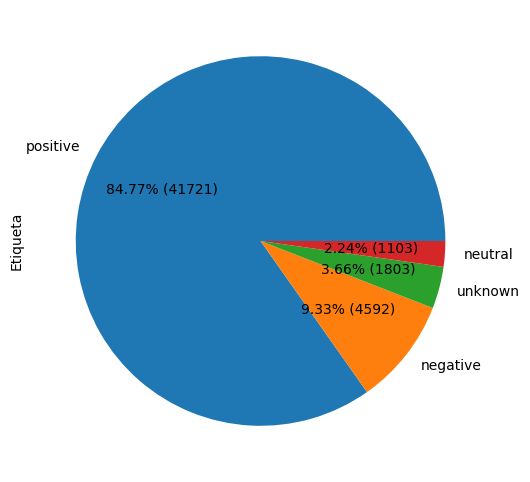

In [123]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(6, 6))
ax = teste['gpt_label'].value_counts().plot.pie(autopct=lambda p: '{:.2f}% ({:.0f})'.format(p, len(teste) * p / 100))
ax.set_ylabel("Etiqueta")

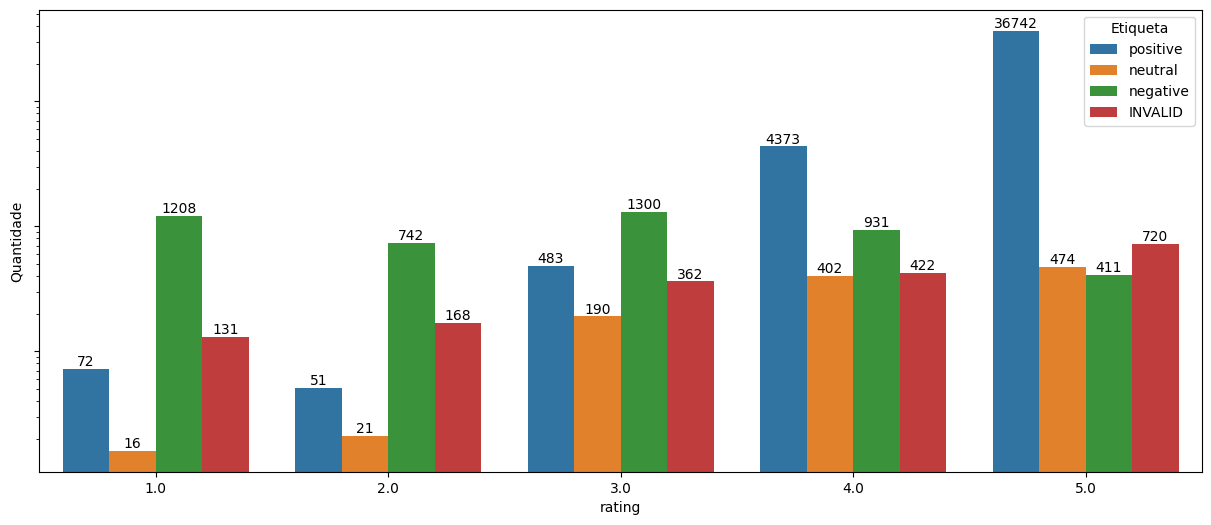

In [124]:
import seaborn as sns
plt.figure(figsize=(15, 6))
sns.countplot(x="rating",hue='sentimento_gpt', data=teste)
ax = plt.gca()
ax.set_yscale("log")
ax.set_yticklabels([])
# Add count values on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()),
                       ha='center', va='bottom')

ax.set_ylabel("Quantidade")
# ax.set_xlabel("Ano da avaliação")
ax.legend(title='Etiqueta')
plt.show()

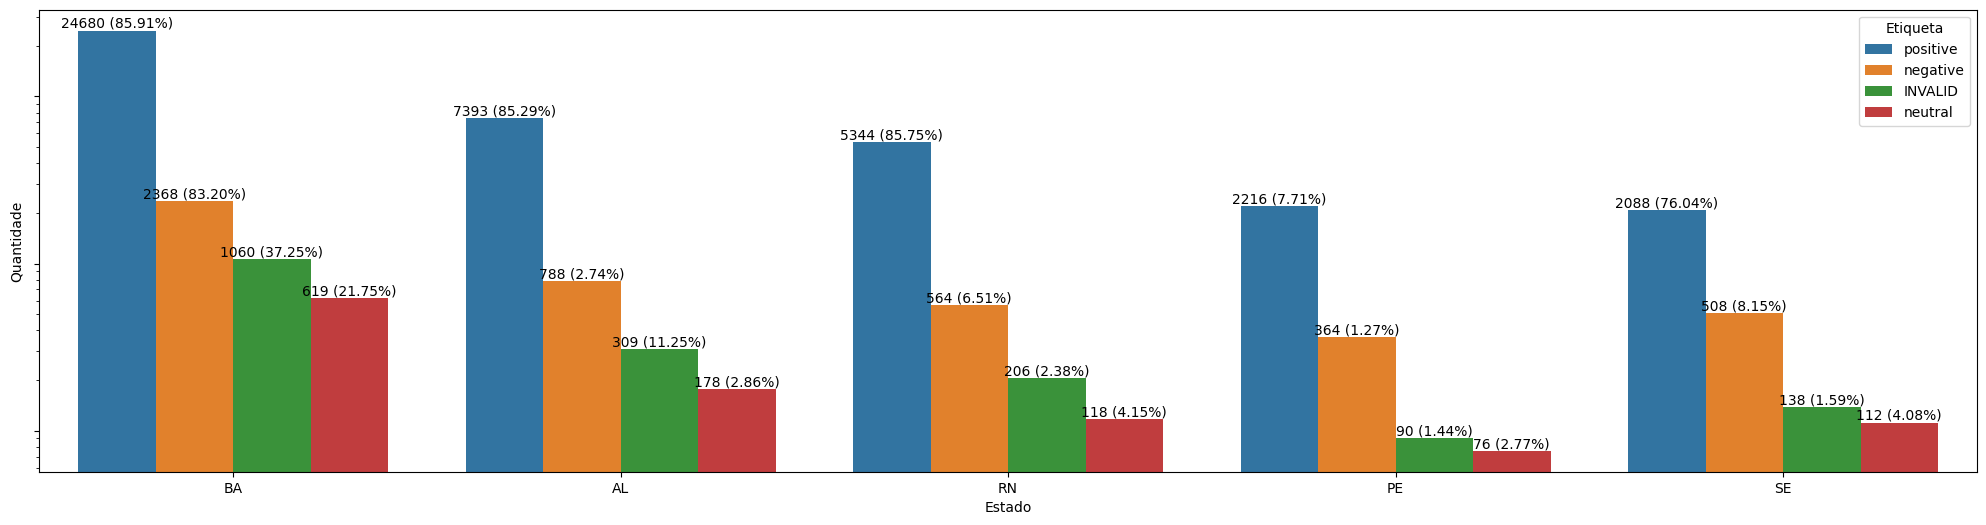

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 1, figsize=(25, 6))
state_counts = hotels_reviews.groupby(['state', 'sentimento_gpt']).sum().reset_index().sort_values('counts', ascending=False)

g = sns.barplot(data=state_counts, x='state', hue='sentimento_gpt', y='counts', ax=ax)
# ax.set_title('Sentiment of reviews by State')
# ax.set_xlabel('State')
# Calculate total counts for each state
total_counts = state_counts.groupby('state')['counts'].transform('sum')

for p, total_count in zip(ax.patches, total_counts):
    # Get the count value of the bar
    count = p.get_height()
    percentage = (count / total_count) * 100
    # Add the count value as text annotation
    ax.annotate(f'{int(count)} ({percentage:.2f}%)', (p.get_x() + p.get_width() / 2, p.get_height()),
                      ha='center', va='bottom')

ax.set_yscale("log")
ax.set_yticklabels([])
ax.set_ylabel("Quantidade")
ax.set_xlabel("Estado")
ax.legend(title='Etiqueta')
# Display the plots
plt.show()

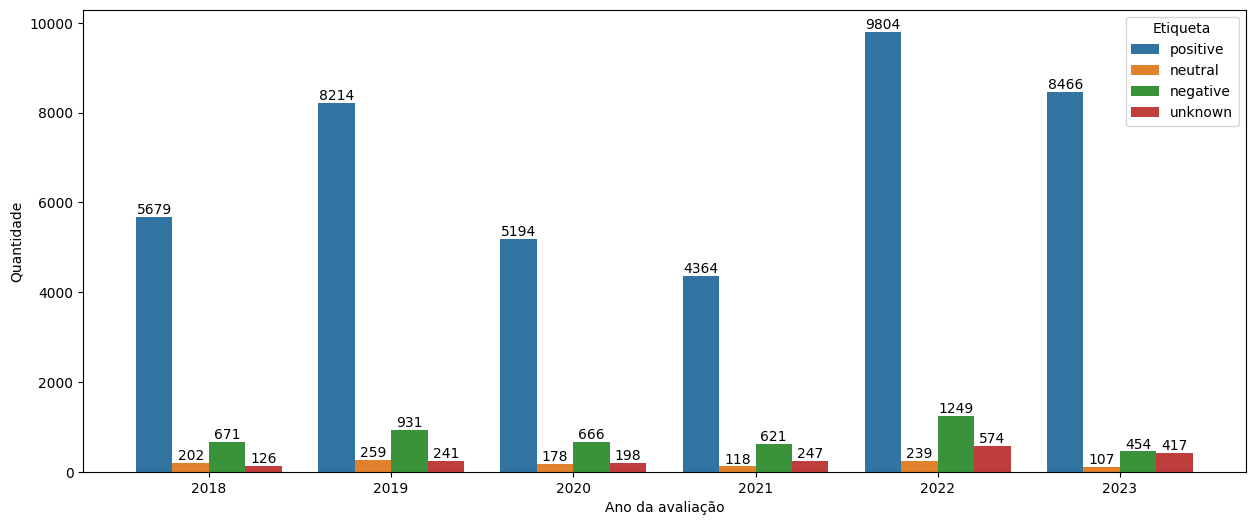

In [97]:
import seaborn as sns
import matplotlib as mpl
plt.figure(figsize=(15, 6))
sns.countplot(x='ano_avaliacao', hue='gpt_label', data=teste)

ax = plt.gca()
# Add count values on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()),
                       ha='center', va='bottom')
ax.yaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.autoscale()
ax.set_ylabel("Quantidade")
ax.set_xlabel("Ano da avaliação")
ax.legend(title='Etiqueta')
plt.show()

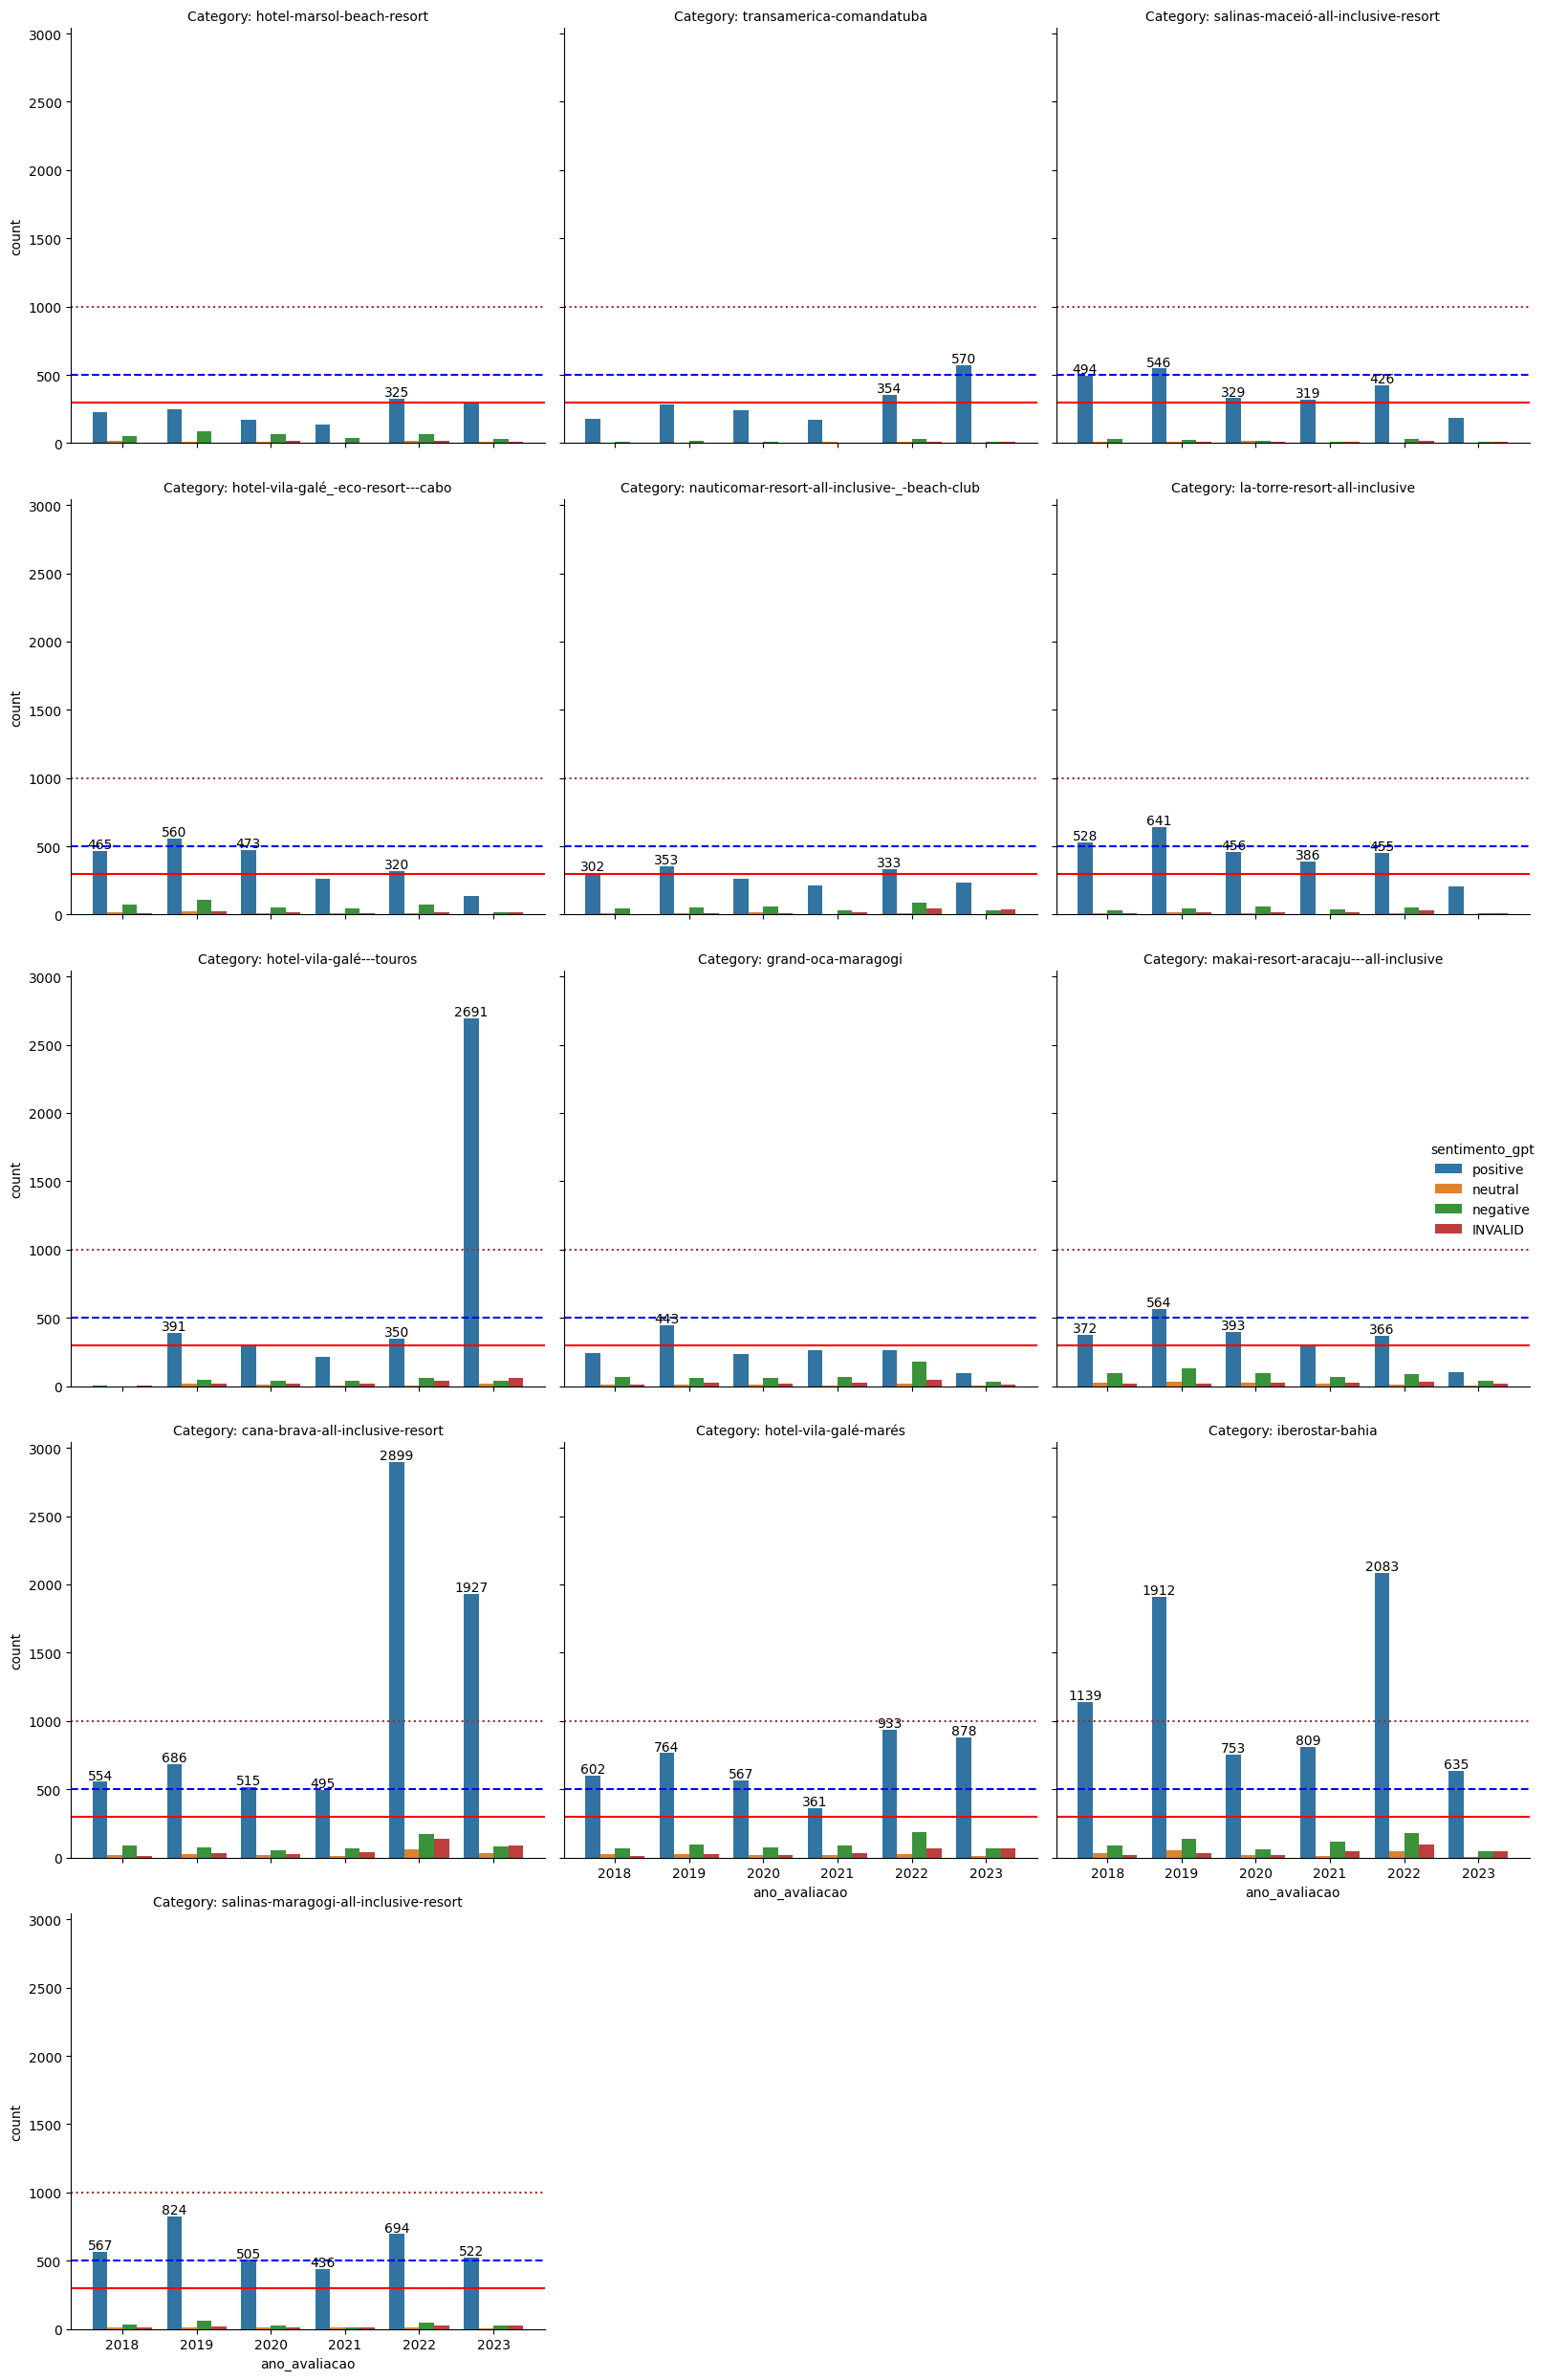

In [74]:
# Create countplot with subplots
g = sns.catplot(
    x="ano_avaliacao",
    hue='sentimento_gpt',
    col="source",
    data=teste,
    col_wrap=3,
    kind='count',
    height=5,
    aspect=1,
)

# Iterate over each subplot
for ax in g.axes.flat:
    ax.yaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
    ax.autoscale()
    # Iterate over each bar in the subplot
    for p in ax.patches:
        # Get the count value of the bar
        count = p.get_height()
        if(count>300):
          # Add the count value as text annotation
          ax.annotate(int(count),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center',
                      va='center',
                      xytext=(0, 5), textcoords='offset points')
    ax.axhline(y=300, color='red', linestyle='-')
    ax.axhline(y=500, color='blue', linestyle='--')
    ax.axhline(y=1000, color='brown', linestyle=':')

# Set titles for each subplot
g.set_titles("Category: {col_name}")

# Adjust spacing between subplots
plt.tight_layout()
# Display the plot
plt.show()


#### Vicuna

8h executando

In [75]:
teste['vicuna_label'].value_counts()

positive    42394
negative     2751
neutral      2328
unknown      1746
Name: vicuna_label, dtype: int64

Text(0, 0.5, 'Etiqueta')

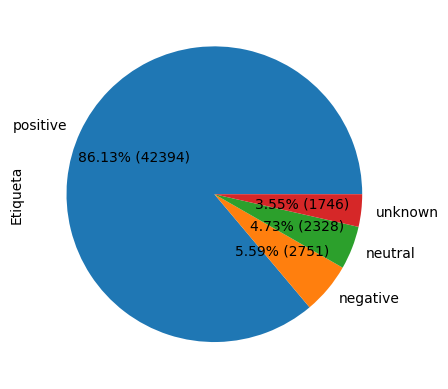

In [130]:
ax = teste['vicuna_label'].value_counts().plot.pie(autopct=lambda p: '{:.2f}% ({:.0f})'.format(p, len(teste) * p / 100))
ax.set_ylabel("Etiqueta")
# ax.set_xlabel("Ano da avaliação")
# ax.legend(title='Etiqueta')

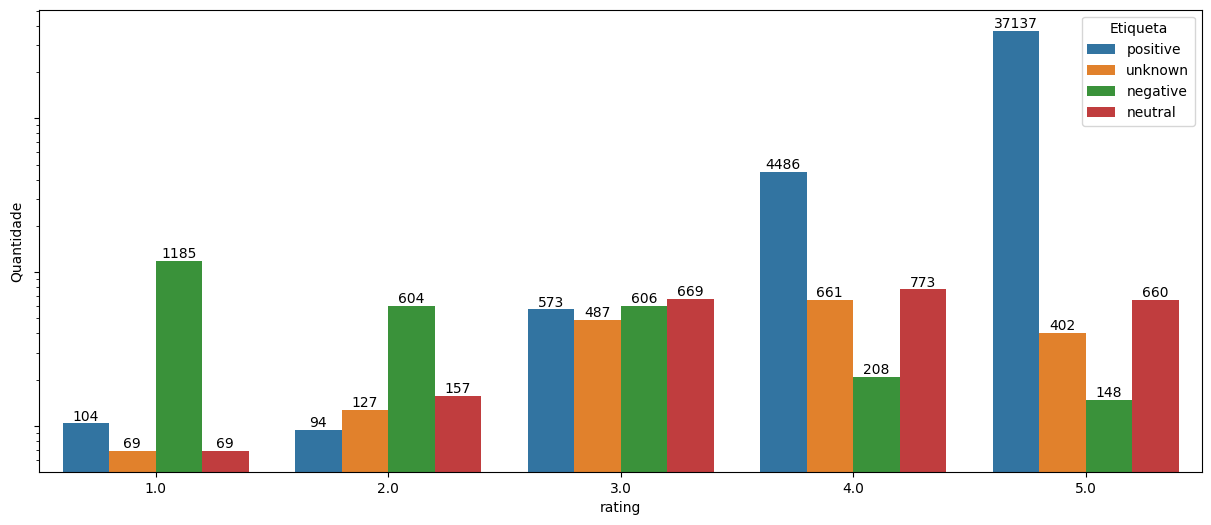

In [98]:
import seaborn as sns
plt.figure(figsize=(15, 6))
sns.countplot(x="rating",hue='vicuna_label', data=teste)
ax = plt.gca()
ax.set_yscale("log")
ax.set_yticklabels([])
# Add count values on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()),
                       ha='center', va='bottom')

ax.set_ylabel("Quantidade")
ax.legend(title='Etiqueta')
plt.show()

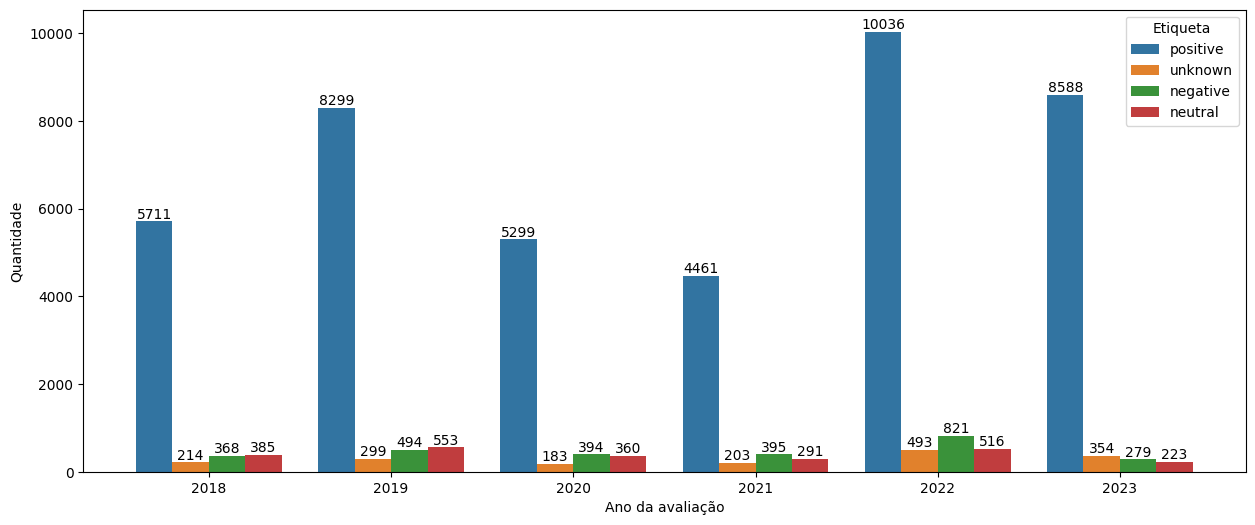

In [99]:
plt.figure(figsize=(15, 6))
sns.countplot(x='ano_avaliacao', hue='vicuna_label', data=teste)
ax = plt.gca()
# Add count values on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()),
                       ha='center', va='bottom')
ax.yaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.autoscale()
ax.set_ylabel("Quantidade")
ax.set_xlabel("Ano da avaliação")
ax.legend(title='Etiqueta')
plt.show()

#### openchat

In [ ]:
teste['openchat_label'].value_counts()

positive    40818
unknown      5568
neutral      2080
negative      753
Name: openchat_label, dtype: int64

Text(0, 0.5, 'Etiqueta')

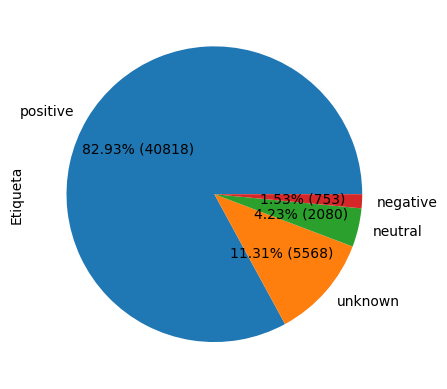

In [131]:
ax = teste['openchat_label'].value_counts().plot.pie(autopct=lambda p: '{:.2f}% ({:.0f})'.format(p, len(teste) * p / 100))
ax.set_ylabel("Etiqueta")

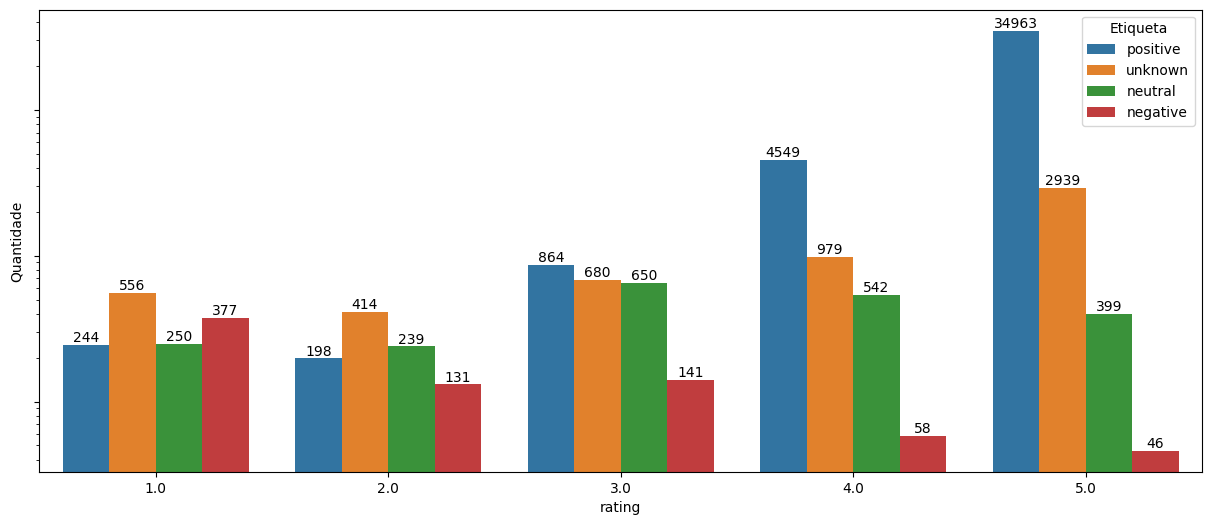

In [100]:
import seaborn as sns
plt.figure(figsize=(15, 6))
sns.countplot(x="rating",hue='openchat_label', data=teste)
ax = plt.gca()
ax.set_yscale("log")
ax.set_yticklabels([])
# Add count values on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()),
                       ha='center', va='bottom')

ax.set_ylabel("Quantidade")
ax.legend(title='Etiqueta')
plt.show()

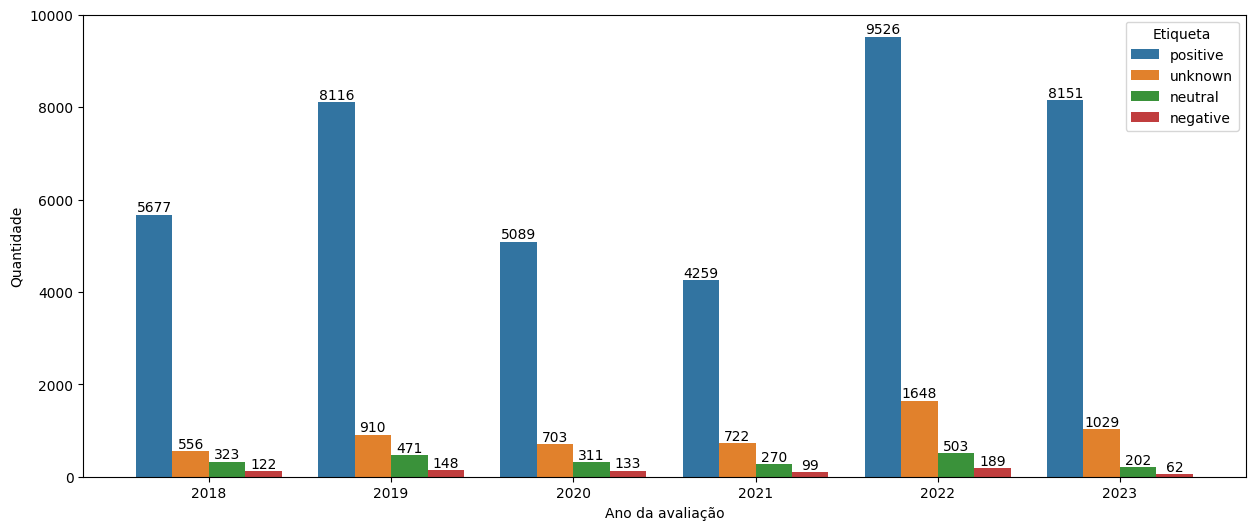

In [101]:
plt.figure(figsize=(15, 6))
sns.countplot(x='ano_avaliacao', hue='openchat_label', data=teste)
ax = plt.gca()
# Add count values on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()),
                       ha='center', va='bottom')
ax.yaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.autoscale()
ax.set_ylabel("Quantidade")
ax.set_xlabel("Ano da avaliação")
ax.legend(title='Etiqueta')
plt.show()

#### berts

Text(0, 0.5, 'Etiqueta BERTs')

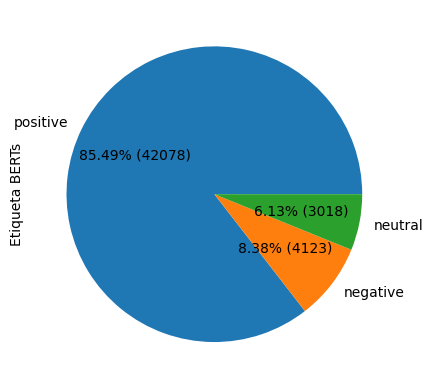

In [119]:
ax = teste['bert_label'].value_counts().plot.pie(y='bert_label', autopct=lambda p: '{:.2f}% ({:.0f})'.format(p, len(teste) * p / 100))
ax.set_ylabel("Etiqueta BERTs")

Text(0, 0.5, 'citizenlab igual GPT')

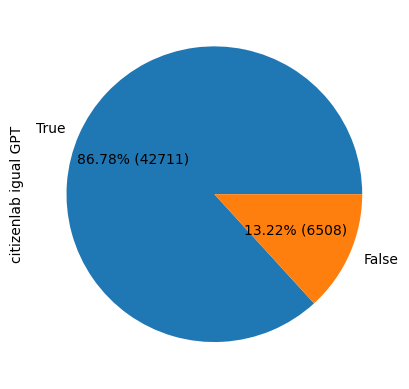

In [121]:
ax = teste['citizenlab_gpt_match'].value_counts().plot.pie(autopct=lambda p: '{:.2f}% ({:.0f})'.format(p, len(teste) * p / 100))
ax.set_ylabel("citizenlab igual GPT")

Text(0, 0.5, 'philschmid igual GPT')

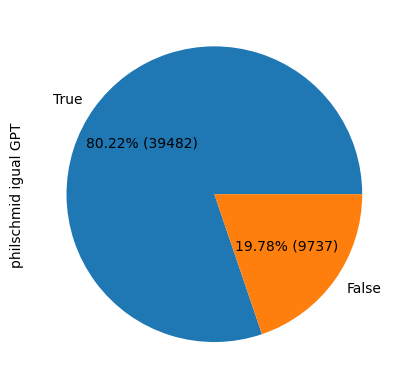

In [122]:
ax = teste['philschmid_gpt_match'].value_counts().plot.pie(autopct=lambda p: '{:.2f}% ({:.0f})'.format(p, len(teste) * p / 100))
ax.set_ylabel("philschmid igual GPT")

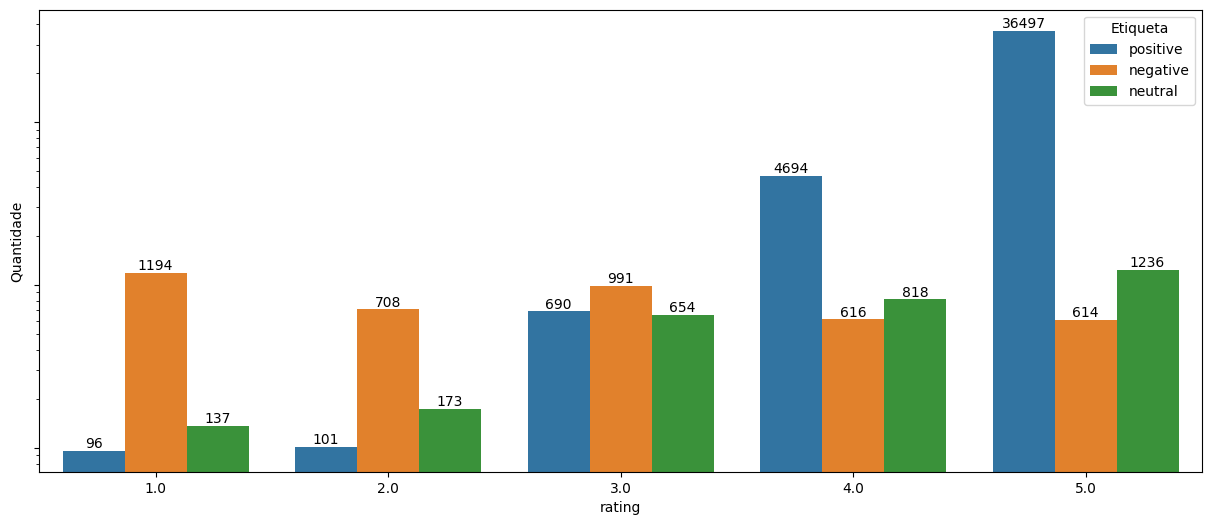

In [104]:
import seaborn as sns
plt.figure(figsize=(15, 6))
sns.countplot(x="rating",hue='bert_label', data=teste)
ax = plt.gca()
ax.set_yscale("log")
ax.set_yticklabels([])
# Add count values on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()),
                       ha='center', va='bottom')
ax.set_ylabel("Quantidade")
ax.legend(title='Etiqueta')
plt.show()

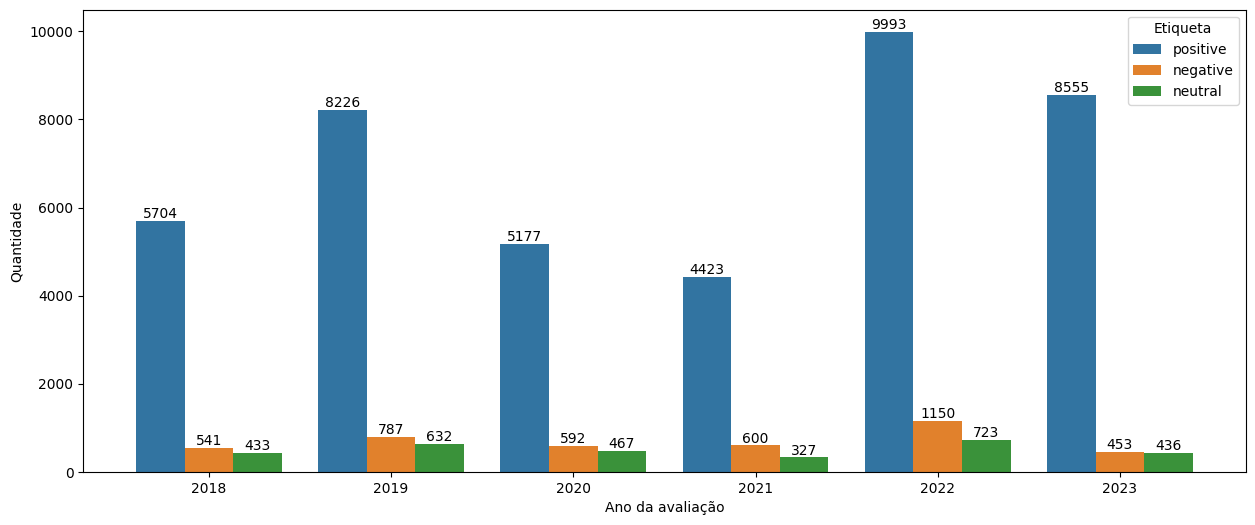

In [105]:
plt.figure(figsize=(15, 6))
sns.countplot(x='ano_avaliacao', hue='bert_label', data=teste)
ax = plt.gca()
# Add count values on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()),
                       ha='center', va='bottom')
ax.yaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.autoscale()
ax.set_ylabel("Quantidade")
ax.set_xlabel("Ano da avaliação")
ax.legend(title='Etiqueta')
plt.show()

### distribuição da classificação dois a dois

In [ ]:
import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
    from matplotlib import pyplot as plt
    import seaborn as sns
    import pandas as pd

    plt.subplots(figsize=(8 * figscale, 8 * figscale))

    # Create a 2D histogram DataFrame
    df_2dhist = pd.DataFrame({
        x_label: grp[y_colname].value_counts()
        for x_label, grp in df.groupby(x_colname)
    })

    # Create the heatmap
    sns.heatmap(df_2dhist, cmap=mpl_palette_name, annot=True, fmt='.0f')  # Set annot=True for annotations, fmt='d' for integer values

    plt.xlabel(x_colname)
    plt.ylabel(y_colname)

    return autoviz.MplChart.from_current_mpl_state()

#### GPT vs bert por ano

In [ ]:
import numpy as np
from google.colab import autoviz

def heatmap2(df, ano, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
    return heatmap(df[df['ano_avaliacao'] == ano], x_colname, y_colname, figscale, mpl_palette_name)

##### 2018

In [ ]:
heatmap2(teste, 2018, 'gpt_label', 'bert_label')

##### 2019

In [ ]:
heatmap2(teste, 2019, 'gpt_label', 'bert_label')

##### 2020

In [ ]:
heatmap2(teste, 2020, 'gpt_label', 'bert_label')

##### 2021

In [ ]:
heatmap2(teste, 2021, 'gpt_label', 'bert_label')

##### 2022

In [ ]:
heatmap2(teste, 2022, 'gpt_label', 'bert_label')

##### 2023

In [ ]:
heatmap2(teste, 2023, 'gpt_label', 'bert_label')

In [ ]:
heatmap(teste, 'gpt_label', 'bert_label')

In [ ]:
dfff = pd.DataFrame({
    (x_label, bert_label): grp['bert_label'].value_counts()
    for (x_label, bert_label), grp in teste.groupby(['ano_avaliacao', 'gpt_label'])
})

#### GPT e vicuna

Text(0, 0.5, 'vicuna igual gpt')

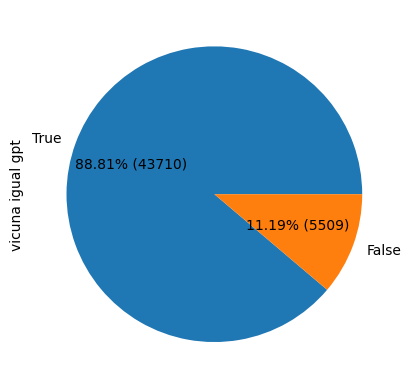

In [132]:
ax = teste['vicuna_gpt_match'].value_counts().plot.pie(autopct=lambda p: '{:.2f}% ({:.0f})'.format(p, len(teste) * p / 100))
ax.set_ylabel("vicuna igual gpt")

In [ ]:
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.width', 2000,
                       'display.float_format', '{:20,.2f}'.format,
                       'display.max_colwidth', None):
  display(pd.DataFrame({
      vicuna_label: grp['gpt_label'].value_counts()/49219*100
      for vicuna_label, grp in teste.groupby('vicuna_label')
  }))

,negative,neutral,positive,unknown
negative,4.96,2.13,1.01,1.24
neutral,0.02,1.07,0.98,0.17
positive,0.09,1.05,82.13,1.50
unknown,0.52,0.49,2.01,0.65


In [ ]:
teste.shape

(49219, 44)

In [ ]:
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.width', 2000,
                       'display.float_format', '{:20,.2f}'.format,
                       'display.max_colwidth', None):
  display(pd.DataFrame({
      (x_label, vicuna_label): grp['gpt_label'].value_counts()
      for (x_label, vicuna_label), grp in teste.groupby(['ano_avaliacao', 'vicuna_label'])
  }))

2018                              2019                              2020                              2021                              2022                                          2023                         
         negative neutral positive unknown negative neutral positive unknown negative neutral positive unknown negative neutral positive unknown negative neutral positive unknown             negative neutral positive unknown
negative      335     160       86      90      441     257      115     118      366     171       54      75      350     133       59      79      717     244      127     161               231.00      82       56      85
neutral         3     110       69      20        4     136      104      15        2      86       85       5        1      65       47       5        1      94      121      23                  NaN      36       57      14
positive        8      95     5490      86       15     124     7948     127        6      77     5039      72        2      58     4226      78        9      97     9499     199                 3.00      64     8223     176
unknown        22      20       66      18       34      36      132      39       20      26      121      31       42      35      129      41       94      81      289     110                45.00      41      252      79

In [ ]:
heatmap(teste, *['gpt_label', 'vicuna_label'], **{})

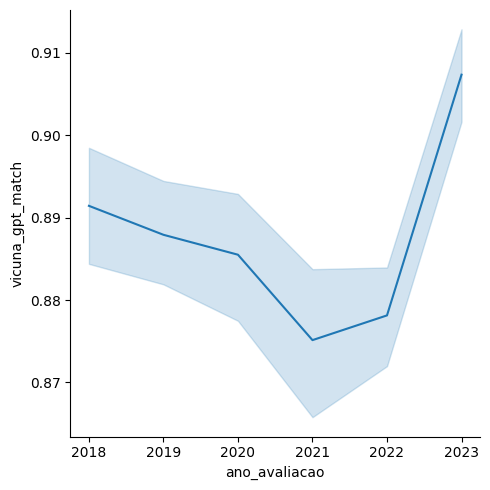

In [ ]:
sns.relplot(x='ano_avaliacao', y='vicuna_gpt_match', kind="line", data=teste)

#### GPT e openchat

Text(0, 0.5, 'openchat igual gpt')

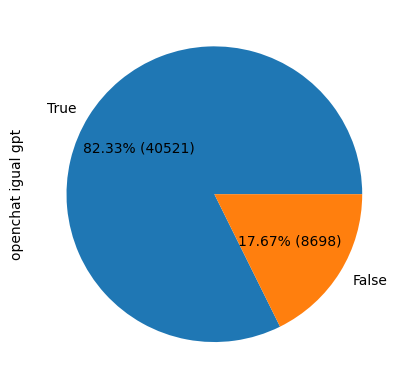

In [133]:
ax = teste['openchat_gpt_match'].value_counts().plot.pie(autopct=lambda p: '{:.2f}% ({:.0f})'.format(p, len(teste) * p / 100))
ax.set_ylabel("openchat igual gpt")

In [ ]:
heatmap(teste, *['gpt_label', 'openchat_label'], **{})

In [ ]:
heatmap(teste, *['bert_label', 'openchat_label'], **{})

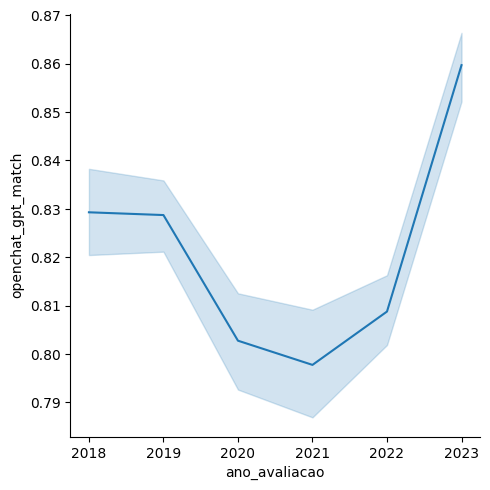

In [ ]:
sns.relplot(x='ano_avaliacao', y='openchat_gpt_match', kind="line", data=teste)

#### vicuna e openchat

Text(0, 0.5, 'vicuna igual openchat')

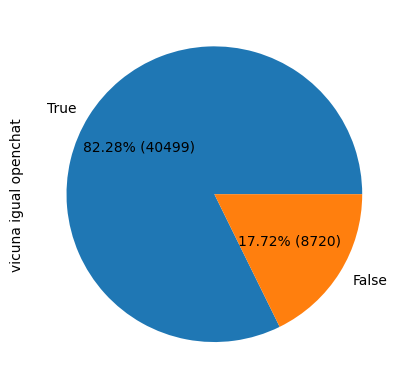

In [134]:
ax = teste['vicuna_openchat_match'].value_counts().plot.pie(autopct=lambda p: '{:.2f}% ({:.0f})'.format(p, len(teste) * p / 100))
ax.set_ylabel("vicuna igual openchat")

In [ ]:
heatmap(teste, *['vicuna_label', 'openchat_label'], **{})

#### BERTS

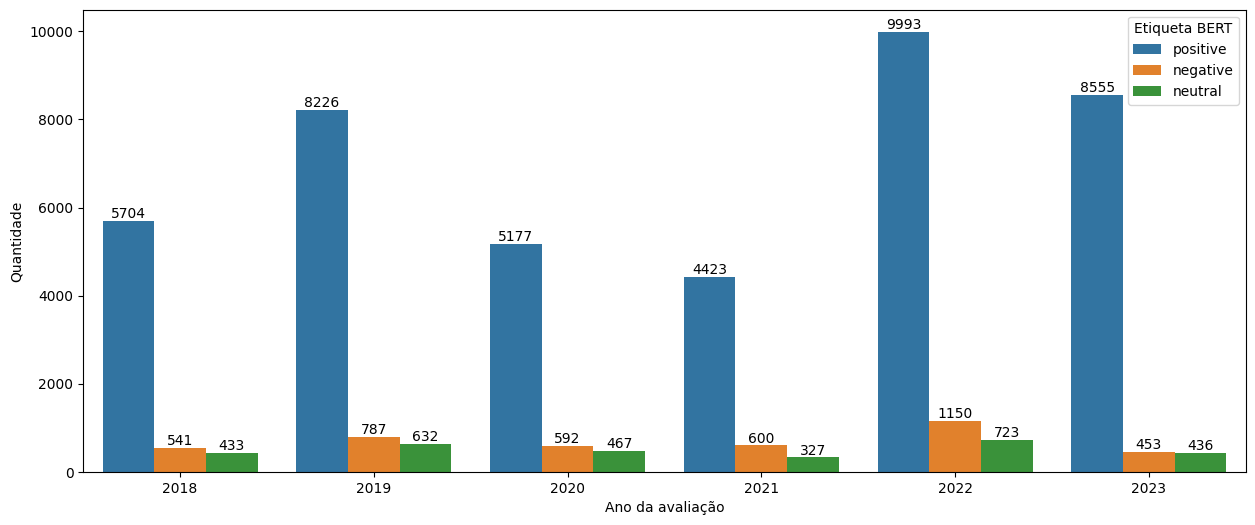

In [140]:
plt.figure(figsize=(15, 6))
sns.countplot(x='ano_avaliacao', hue='bert_label', data=teste)
ax = plt.gca()
# Add count values on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()),
                       ha='center', va='bottom')

ax.set_ylabel("Quantidade")
ax.set_xlabel("Ano da avaliação")
ax.legend(title="Etiqueta BERT")
plt.show()

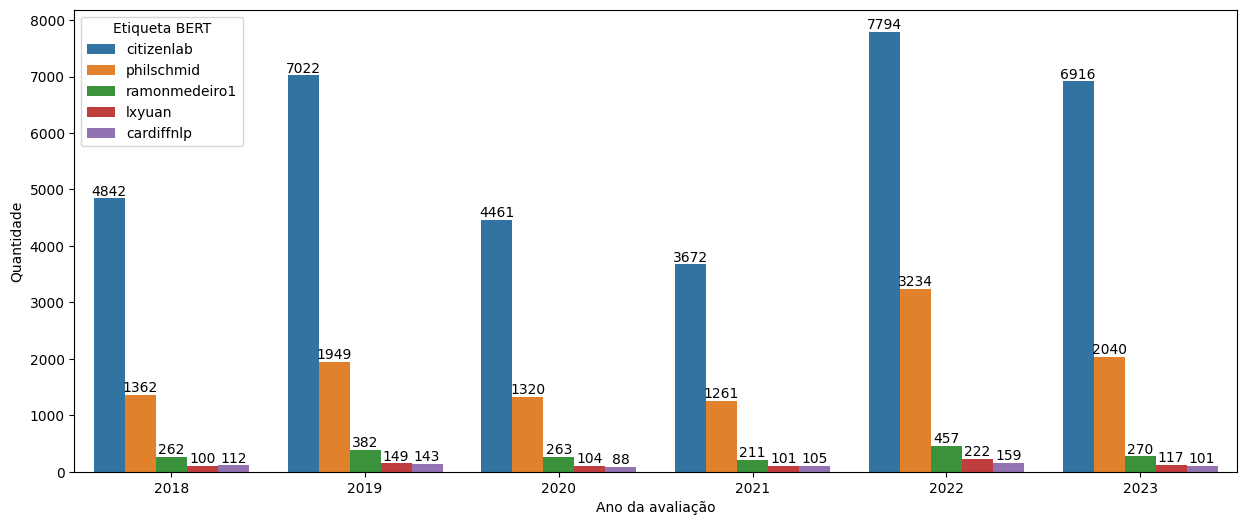

In [159]:
plt.figure(figsize=(15, 6))
sns.countplot(x='ano_avaliacao',
              hue='sentiment_bert_max',
              data=teste)
plt.legend(bbox_to_anchor=(1.05, .6), loc='upper left', borderaxespad=0)
ax = plt.gca()
# Add count values on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()),
                       ha='center', va='bottom')
ax.set_ylabel("Quantidade")
ax.set_xlabel("Ano da avaliação")
ax.legend(title="BERT")
plt.show()

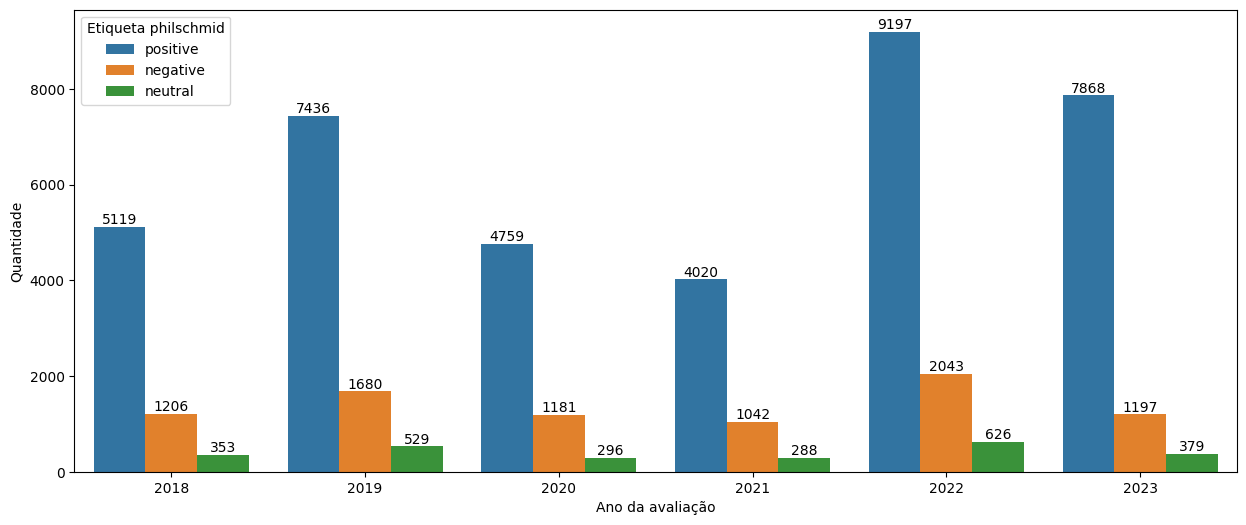

In [149]:
plt.figure(figsize=(15, 6))
sns.countplot(x='ano_avaliacao', hue='philschmid_bert_label', data=teste)
ax = plt.gca()
# Add count values on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()),
                       ha='center', va='bottom')

ax.set_ylabel("Quantidade")
ax.set_xlabel("Ano da avaliação")
ax.legend(title="Etiqueta philschmid")
plt.show()

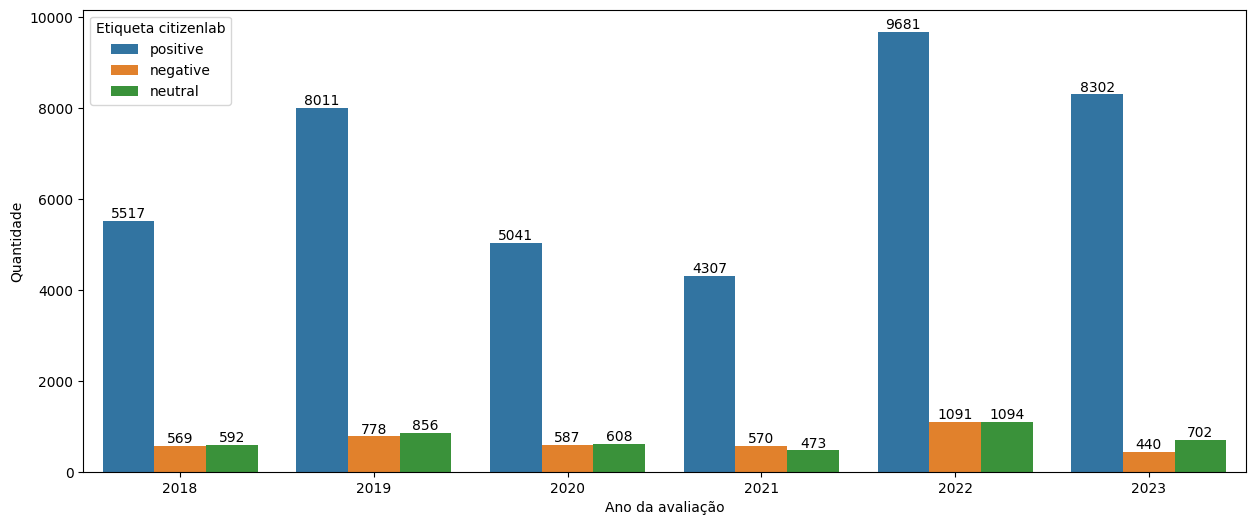

In [150]:
plt.figure(figsize=(15, 6))
sns.countplot(x='ano_avaliacao', hue='citizenlab_bert_label', data=teste)
ax = plt.gca()
# Add count values on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()),
                       ha='center', va='bottom')
ax.set_ylabel("Quantidade")
ax.set_xlabel("Ano da avaliação")
ax.legend(title="Etiqueta citizenlab")
plt.show()

Text(0, 0.5, 'BERTs igual gpt')

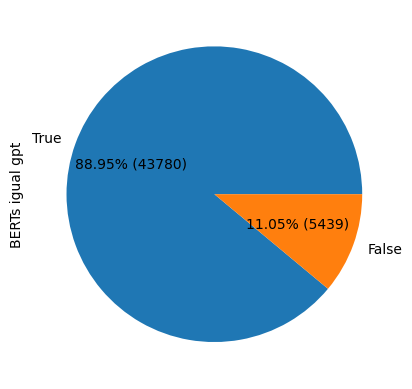

In [151]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = teste['bert_gpt_match'].value_counts().plot.pie(autopct=lambda p: '{:.2f}% ({:.0f})'.format(p, len(teste) * p / 100))
ax.set_ylabel("BERTs igual gpt")

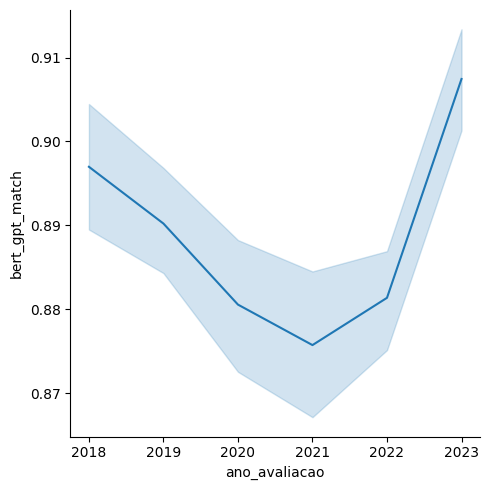

In [ ]:
sns.relplot(x='ano_avaliacao', y='bert_gpt_match', kind="line", data=teste)

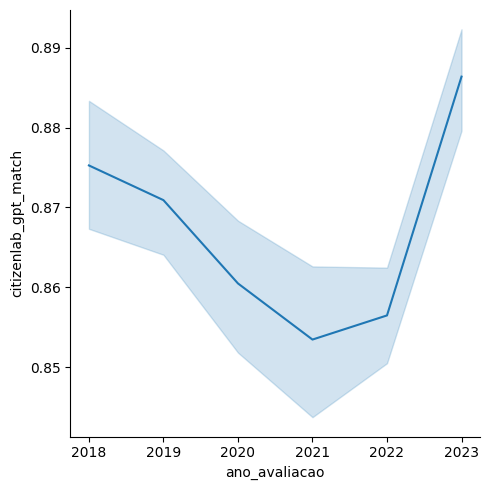

In [ ]:
sns.relplot(x='ano_avaliacao', y='citizenlab_gpt_match', kind="line", data=teste)

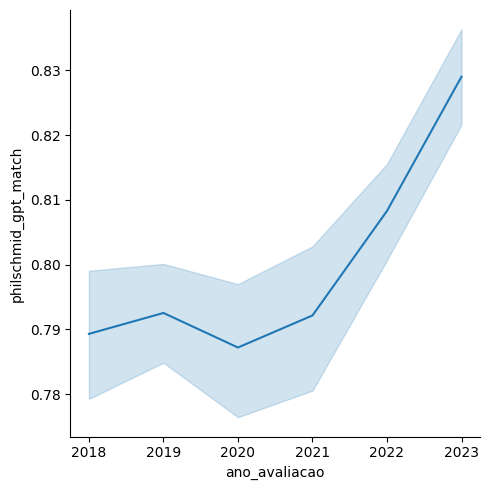

In [ ]:
sns.relplot(x='ano_avaliacao', y='philschmid_gpt_match', kind="line", data=teste)

In [ ]:
heatmap(teste, *['gpt_label', 'bert_label'], **{})

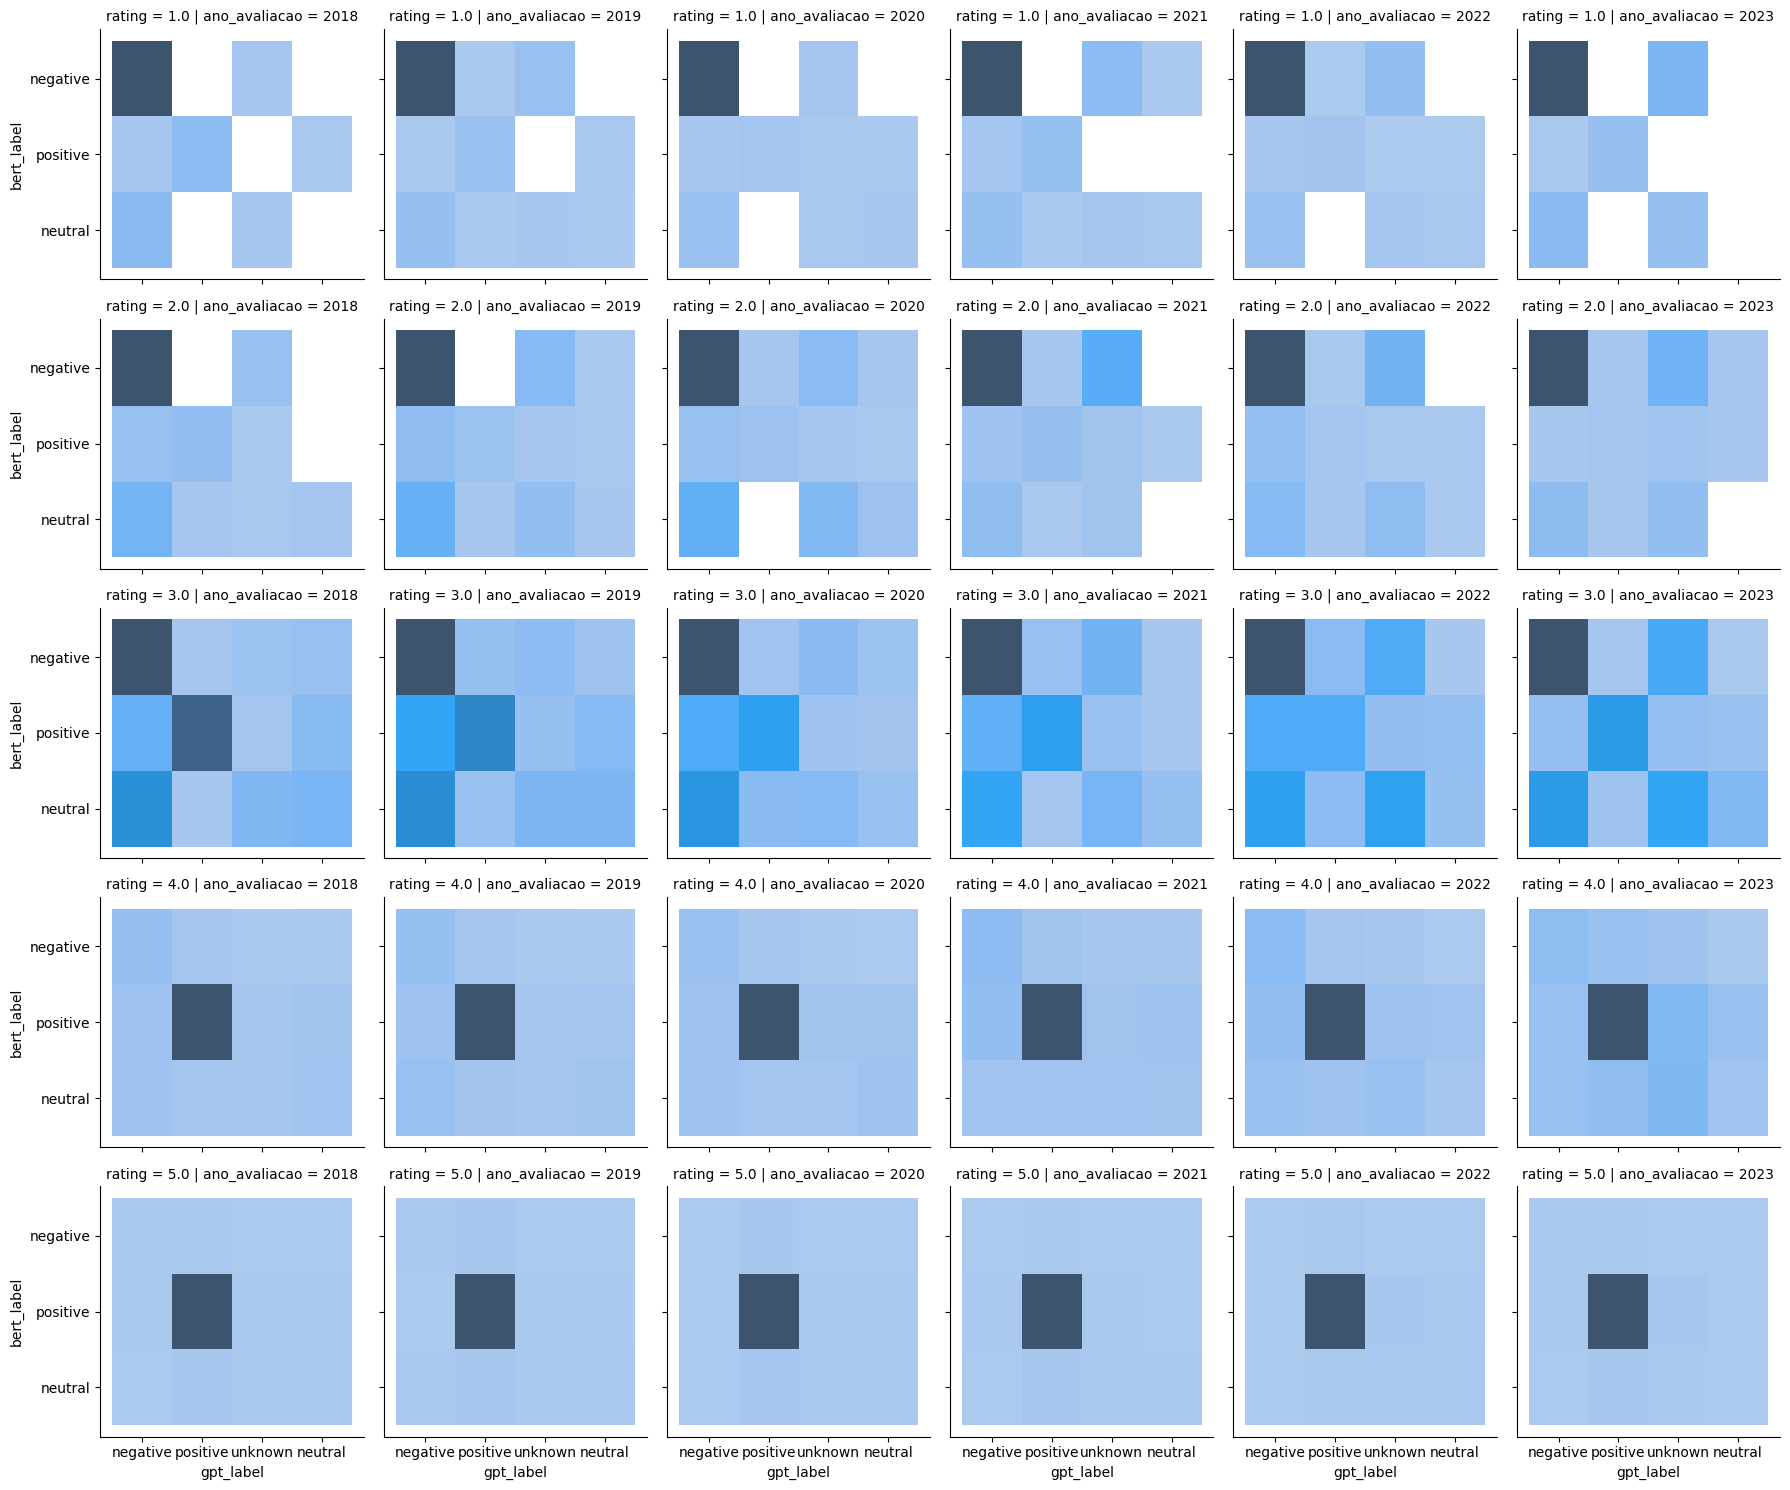

In [ ]:
# sns.FacetGrid?

g = sns.FacetGrid(teste, col="ano_avaliacao", row="rating")
g.map_dataframe(sns.histplot, x="gpt_label", y='bert_label')

#### consistencia da classificacao com o GPT

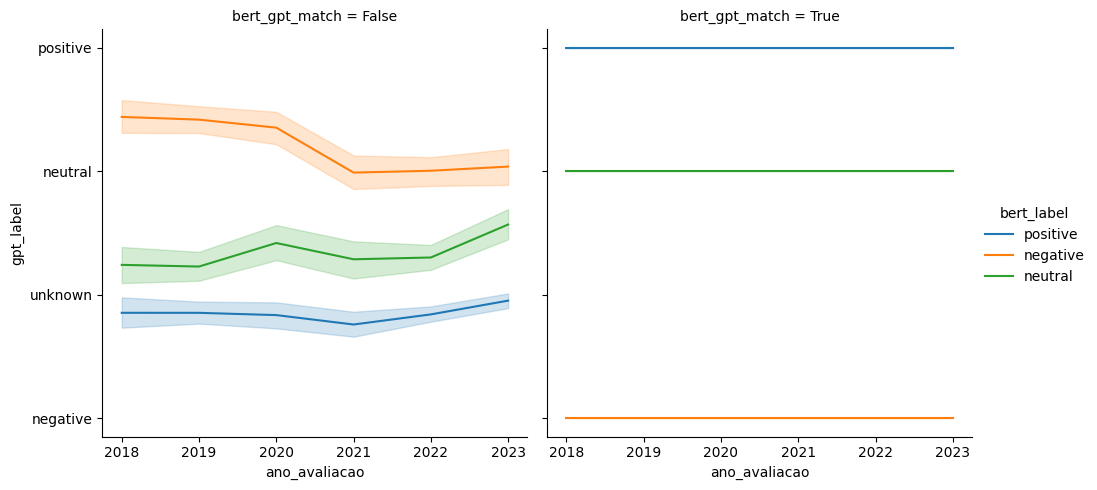

In [ ]:
sns.relplot(x='ano_avaliacao', y='gpt_label', hue='bert_label', col="bert_gpt_match", data=teste, kind='line')

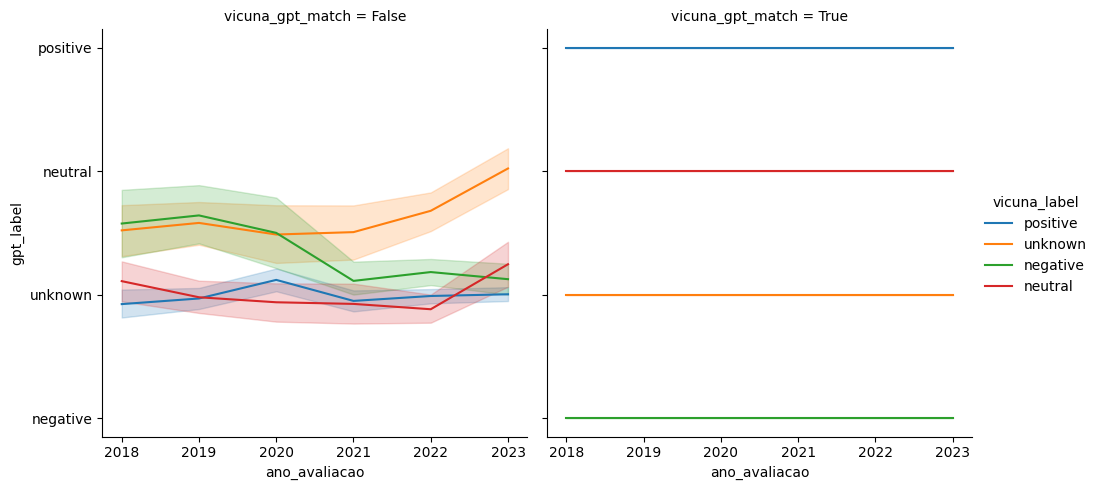

In [ ]:
sns.relplot(x='ano_avaliacao', y='gpt_label', hue='vicuna_label', col="vicuna_gpt_match", data=teste, kind='line')

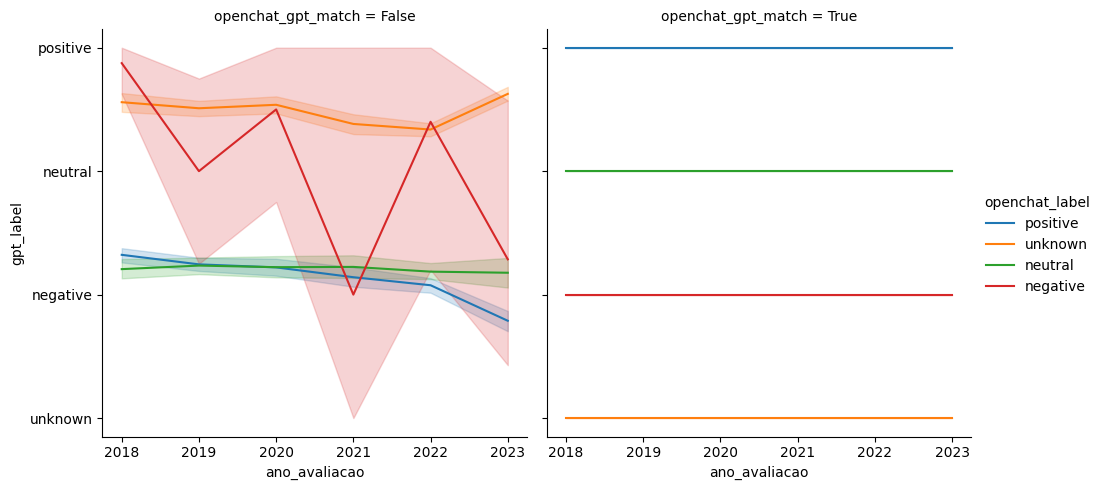

In [ ]:
para você foi atribuida a tarefa de classificar o sentimento de sentenças em português que são avaliações de hoteis, classifique-as em 2, 1 e 0 sem necessidade de justificativasns.relplot(x='ano_avaliacao', y='gpt_label', hue='openchat_label', col="openchat_gpt_match", data=teste, kind='line')

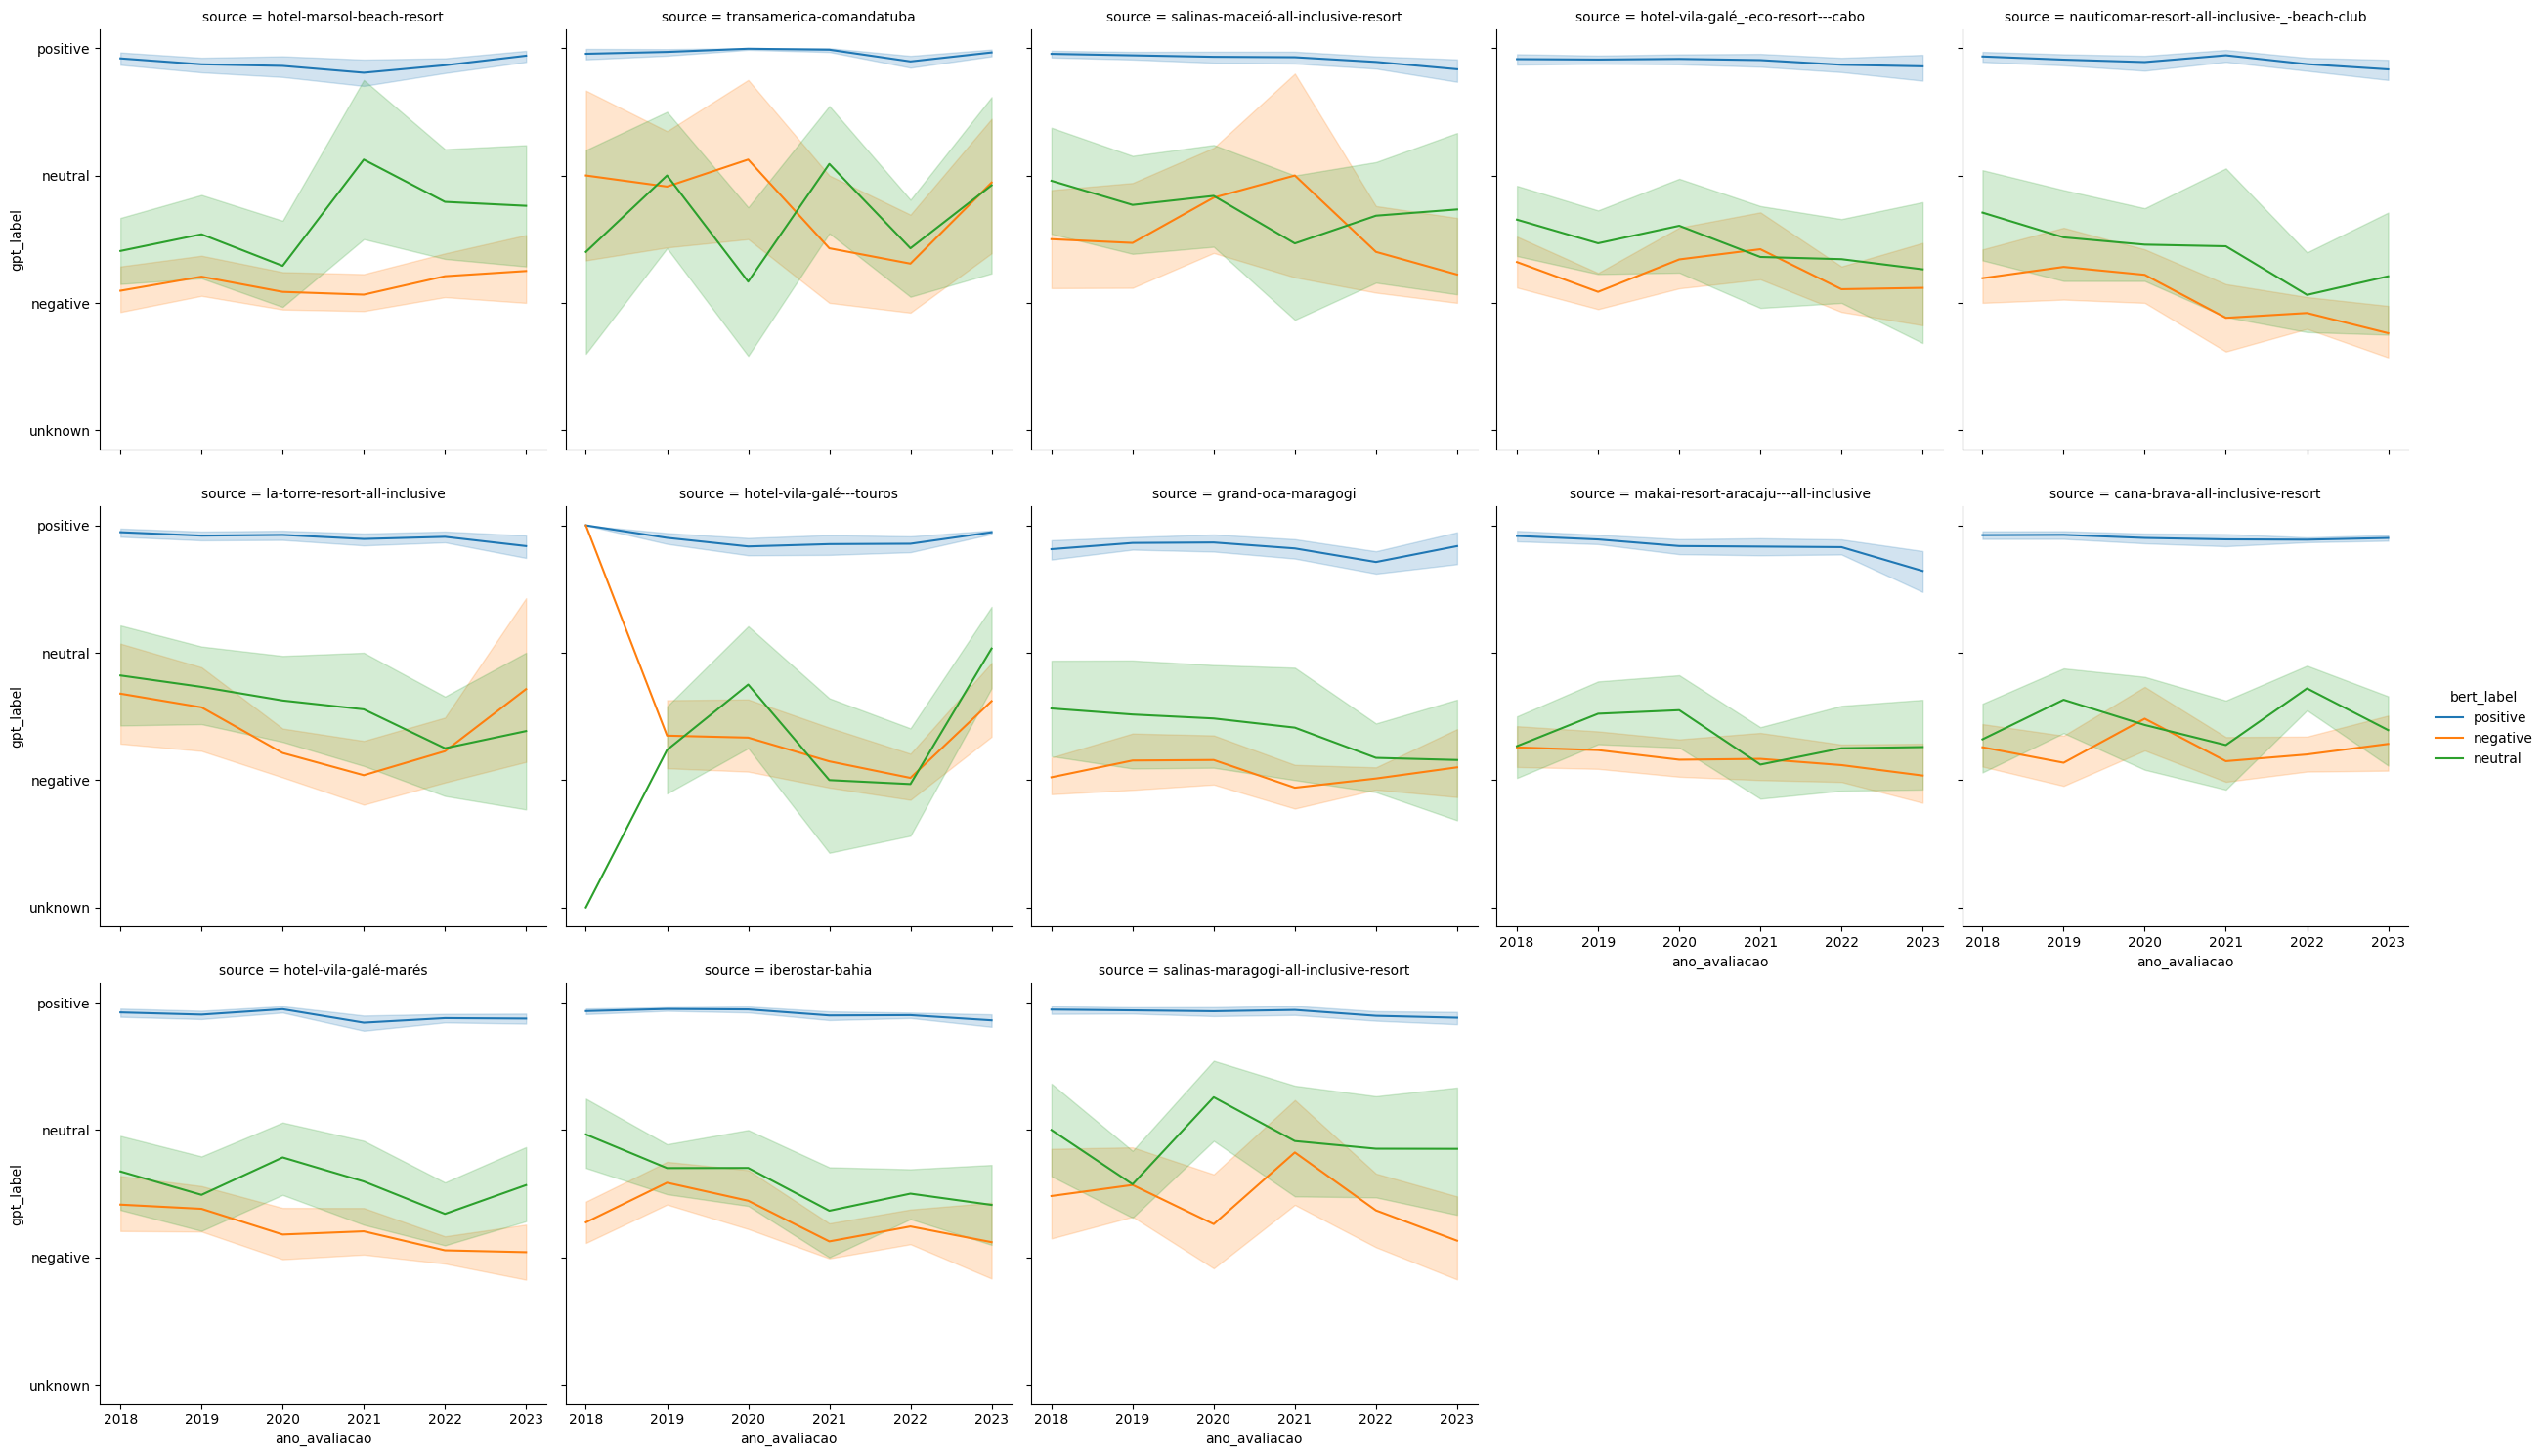

In [ ]:
sns.relplot(x='ano_avaliacao', col_wrap=5, col="source", y='gpt_label', hue='bert_label', data=teste, kind='line')

### inconsistencia do openchat

In [ ]:
teste[teste.text == 'Sem palavras'][['relative_date', 'likes', 'mes_ano_avaliacao', 'sentiment_label', 'sentiment_bert', 'rating', 'text', 'source', 'gpt_label','vicuna_label','openchat_label']]

,relative_date,likes,mes_ano_avaliacao,sentiment_label,sentiment_bert,rating,text,source,gpt_label,vicuna_label,openchat_label
39,3 semanas atrás,0,2023-06,"[positive, neutral, negative]","[{'label': 'positive', 'score': 0.351064860820...",5.0,Sem palavras,hotel-marsol-beach-resort,neutral,positive,positive
5932,5 anos atrás,0,2018-07,"[positive, neutral, negative]","[{'label': 'positive', 'score': 0.351064860820...",5.0,Sem palavras,salinas-maceió-all-inclusive-resort,neutral,positive,positive
14076,5 anos atrás,0,2018-07,"[positive, neutral, negative]","[{'label': 'positive', 'score': 0.351064860820...",5.0,Sem palavras,la-torre-resort-all-inclusive,neutral,positive,positive
14548,2 semanas atrás,0,2023-06,"[positive, neutral, negative]","[{'label': 'positive', 'score': 0.351064860820...",5.0,Sem palavras,hotel-vila-galé---touros,neutral,positive,positive
35522,4 anos atrás,0,2019-07,"[positive, neutral, negative]","[{'label': 'positive', 'score': 0.351064860820...",5.0,Sem palavras,hotel-vila-galé-marés,neutral,positive,neutral
48076,4 anos atrás,1,2019-07,"[positive, neutral, negative]","[{'label': 'positive', 'score': 0.351064860820...",5.0,Sem palavras,salinas-maragogi-all-inclusive-resort,neutral,positive,neutral
48708,5 anos atrás,0,2018-07,"[positive, neutral, negative]","[{'label': 'positive', 'score': 0.351064860820...",5.0,Sem palavras,salinas-maragogi-all-inclusive-resort,neutral,positive,positive


### Tokens

In [ ]:
teste_copy = teste.copy()

In [ ]:
teste_copy[['tokens_vicuna', 'tokens_gpt', 'tokens_openchat']]

,tokens_vicuna,tokens_gpt,tokens_openchat
0,147,102,124
1,141,97,116
2,139,95,117
3,140,96,117
4,140,97,117
...,...,...,...
49214,186,136,167
49215,140,96,117
49216,140,96,119
49217,150,106,127


<Axes: >

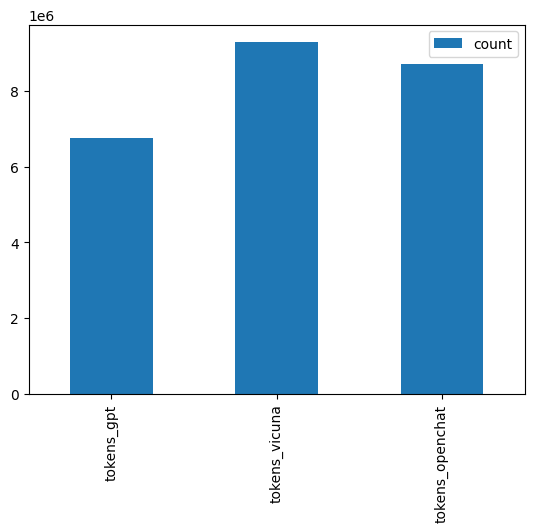

In [ ]:
pd.DataFrame(teste_copy[['tokens_gpt', 'tokens_vicuna', 'tokens_openchat']].sum(), columns=['count']).plot.bar()

# curiosidade

In [ ]:
#@title avaliados como positivo e com 1 de nota

pd.DataFrame(teste[(teste["rating"] == 1) & (teste["sentimento_gpt"] == 'positive')]['text'].value_counts())

,text
Bom,4
Muito bom,2
Maravilhoso,2
Excelente atendimento. Higiene muito boa . Café da manhã com pouco variedade esse é o ponto negativo . Quartos : 4/5,1
"Incrível, estadia maravilhosa....equipe de recreação sensacional.... tio Frajola, Tio Tomate e Tia Pepa são demais..... parabéns! Várias atrações boas para a família toda",1
...,...
Ótimo atendimento,1
Muito lindo,1
"melhor parte é a praia, o local é bem bonito, comida MUITO fraquinha, vale pagar um pouco a mais e ir no salinas",1
Muito legal Maragogi está de parabéns que venha muitas pessoas visitar essa cidade maravilhosa de Maragogi,1
